# Projet - Analyse de donnée - Speed Dating Experiment

Ce projet a été réalisé par Vincent LIU et Samir SAYAH, étudiant en Mathématiques Appliqués et Informatique (MAIN) en année 4 à Polytech Sorbonne dans le cadre de l'UE "Analyse de données".

Pour pouvoir lancer le code il faut installer les packages suivants: ggplot2, GGally, reshape2, gridExtra, ggiraphExtra, MLmetrics et les packages vus en cours.
(Si on vous indique "dead kernel" et que vous n'arrivez pas à lancer le code, installez le package R "IRkernel")


Le jeu de données Speed Dating est composé de plusieurs rencontres entre individus à un évènement de Speed Dating, il content environ 8000 individus décrits par environ 190 variables. Chaque ligne de notre jeu de données correspond à une rencontre entre deux personnes et ce, pour toutes les personnes ayant participé à l'évènement. L'évènement s'est déroulé en plusieurs vagues et des personnes sont susceptibles de s'être rencontrées plusieurs fois. Vous trouverez en pièce jointe le fichier décrivant chaque variable en détail. 

Nous avons choisi de traiter la problèmatique suivante:

## Quels sont les attributs influencant notre prise de décision ?
## Les facteurs influençant le choix d'un partenaire sont-ils ceux auxquels on pense ?

* Comme indique la problématique, notre travail s'est axé autour de la prise de décision de revoir une personne ou non(variable dec valant 0 ou 1).
* Nous avons dans un premier temps essayé de nous familiariser avec le jeu de donnée.
* Puis, nous avons étudié les corrélations entre certaines variables (matrice des corrélations, AFC, ACP).
* Enfin, nous avons essayé d'établir des groupes de personnes suivant les attributs (clustering).
* Et finalement, nous avons testé plusieurs modèles de classification supervisée pour essayer de prédire le résultat de la prise de décision.
    
### Sommaire

1. [Introduction](#Introduction)
1. [Statistique Descriptive - Présentation des participants](#Statistique Descriptive - Presentation des participants)
2. [Age des participants](#Age des participants)    
1. [Origine des participants](#Origine des individus)
1. [Domaine d'étude des participants](#Domaine d'étude des participants)
1. [Objectifs des participants](#Objectifs des participants)
1. [Style de vie des participants](#Habitude de vie des participants)
1. [Corrélation entre le domaine d'étude et les habitudes de vie - AFC](#Corrélation)
1. [Importance des origines éthniques et religieuses](#Importance)
1. [Attentes des différents participants](#Attente)
1. [Statistique Descriptive - Centres d'interêt des participants](#Statistique Descriptive - Centres d'interêt des participants)
1. [Analyse descriptive univariée et bivariées des données](#Analyse descriptive univariée et bivariées des données)
1. [Analyse en composantes principales - ACP](#ACP) 
1. [Influence de la prise de décision - Premiere Partie](#Influence de la prise de décision)
1. [Statistique descriptive des facteurs influents](#Statistique descriptive des facteurs influents)
1. [Classification non supervisée](#Classification non supervisée)
1. [Classifiation supervisée](#Classification supervisée)
1. [Creation d'une echantillon de test](#Creation d'une echantion de test)
1. [Régression logistique](#Régression logistique)
1. [Régression logistique lasso](#Regression logistique lasso)
1. [Arbre de décision](#Arbre de décision)
1. [Random Forest](#Random Forest)
1. [LDA](#LDA)

<a id="Introduction"></a>
> # 0. Introduction

In [1]:
# Ouverture des données
filename = '../input/Speed Dating Data.csv'
data = read.csv(filename, header = T, stringsAsFactors = F)

In [2]:
# En tête du jeu de données
head(data)

iid,id,gender,idg,condtn,wave,round,position,positin1,order,⋯,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,1,1,10,7,NA,4,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,3,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,10,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,5,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,7,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,6,⋯,5,7,7,7,7,NA,NA,NA,NA,NA


In [3]:
# Type des données
str(data)

'data.frame':	8378 obs. of  195 variables:
 $ iid     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ idg     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ condtn  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ wave    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ round   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ position: int  7 7 7 7 7 7 7 7 7 7 ...
 $ positin1: int  NA NA NA NA NA NA NA NA NA NA ...
 $ order   : int  4 3 10 5 7 6 1 2 8 9 ...
 $ partner : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pid     : int  11 12 13 14 15 16 17 18 19 20 ...
 $ match   : int  0 0 1 1 1 0 0 0 1 0 ...
 $ int_corr: num  0.14 0.54 0.16 0.61 0.21 0.25 0.34 0.5 0.28 -0.36 ...
 $ samerace: int  0 0 1 0 0 0 0 0 0 0 ...
 $ age_o   : int  27 22 22 23 24 25 30 27 28 24 ...
 $ race_o  : int  2 2 4 2 3 2 2 2 2 2 ...
 $ pf_o_att: num  35 60 19 30 30 ...
 $ pf_o_sin: num  20 0 18 5 10 ...
 $ pf_o_int: num  20 0 19 15 20 ...
 $ pf_o_fun: num  20 40 18 40 10 ...
 $ pf_o_amb: num  0 0 14 5

On va ici changer le type de certaines variables.

De nombreuses variables qualitatives sont considérées comme des variables quantitatives par R.

| Variables Qualitatives       | Signification                              |
| --------------------------- |:-------------------------------------------:| 
| gender                      | genre d'un invidivdu                        | 
| dec                         | le souhait de revoir la personne            |
| race                        | origine de l'individu                       | 
| goal                        | objectif de la rencontre                    |
| date                        | fréquence de rendez-vous amoureux           |
| go_out                      | fréquence de sortie                         |   
| career_c                    | objectif professionnel                      | 
| field_c                     | domaine d'étude                             |    



In [4]:
# Quantitatives ==> Qualitatives
data$gender = as.factor(data$gender)
data$dec = as.factor(data$dec)
data$race = as.factor(data$race)
data$goal = as.factor(data$goal)
data$date = as.factor(data$date)
data$go_out = as.factor(data$go_out)
data$career_c = as.factor(data$career_c)
data$field_cd = as.factor(data$field_cd)

In [5]:
# Bibliothèques utiles
library(ggplot2) 
library(GGally)
library(reshape2)
library(gridExtra)
library(FactoMineR)
library(ggiraphExtra)

options(warn=-1)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


<a id="Statistique Descriptive - Presentation des participants"></a>
> # 1. Statistique Descriptive - Presentation des participants

<a id="Age des participants"></a>
>> ## 1.1 Age des participants

In [6]:
# Age des participants
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   24.00   26.00   26.36   28.00   55.00      95 

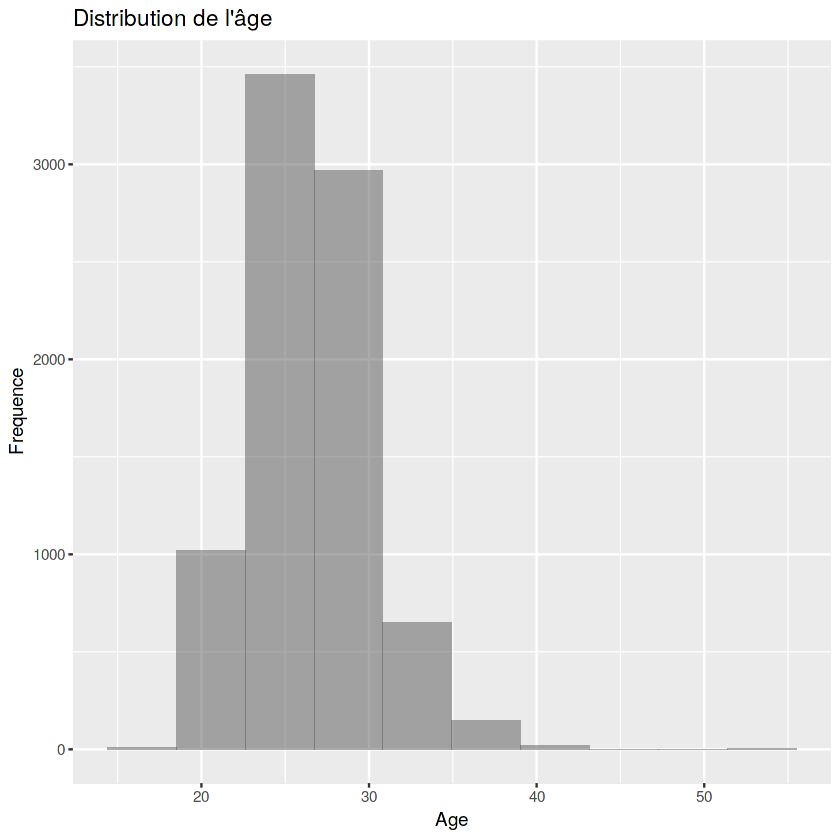

In [7]:
# Histograme de l'age des participants
ggplot(data, aes(x = age)) +  
    geom_histogram(position="identity", bins = 10 , alpha=0.5) + 
    labs(title="Distribution de l'âge",x="Age", y = "Frequence") 

L'age s'etend de $18$ à $55$ ans. Cependant, la majorité des individus sont assez jeunes: en moyenne $26$ ans.

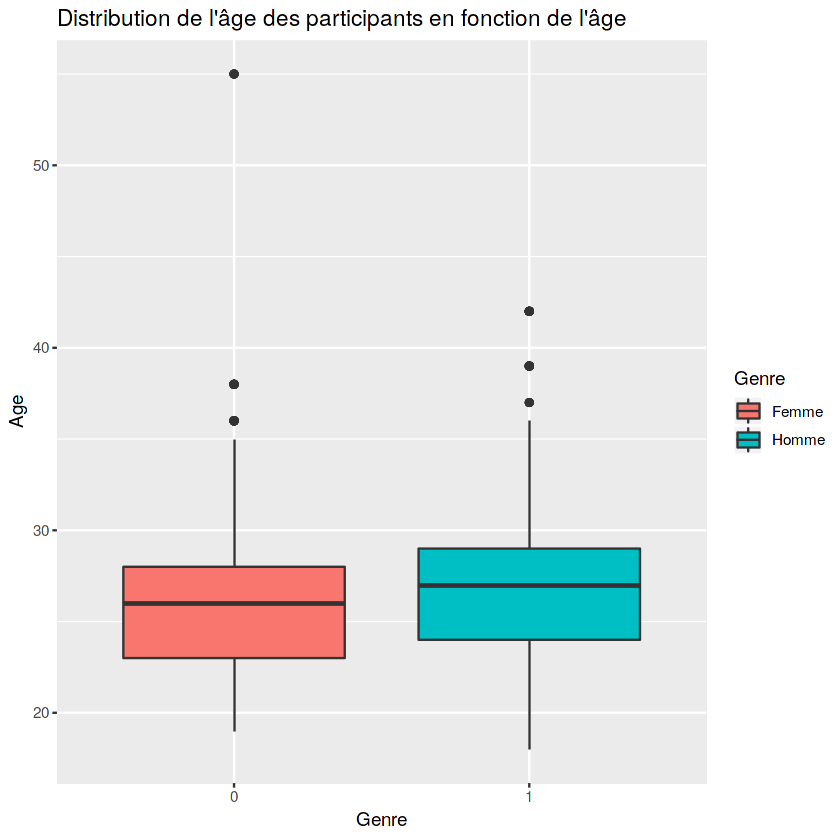

In [8]:
out = na.omit(data.frame(data$age, data$gender))
ggplot(out, aes(x=data.gender, y=data.age, fill=data.gender)) + 
  geom_boxplot() +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution de l'âge des participants en fonction de l'âge",x="Genre", y = "Age") 

On veut tester si la différence d'âge est significative entre les hommes et les femmes.

Comme $n$ est grand, on peut utiliser un test de student avec $H_0$: $\mu_1 = \mu_2$.

In [9]:
t.test(out$data.age ~ out$data.gender)


	Welch Two Sample t-test

data:  out$data.age by out$data.gender
t = -6.4358, df = 8225.8, p-value = 1.297e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.656753 -0.350085
sample estimates:
mean in group 0 mean in group 1 
       26.10585        26.60927 


Comme la p-value est inférieur à $0.01$, on peut rejeter $H_0$ au niveau $1\%$.

La différence d'âge est significative entre les hommes et les femmes.

<a id="Origine des individus"></a>
>> ## 1.2 Origine des individus

On observe que les américains caucasiens sont majoritaires, suivis des asiatiques.

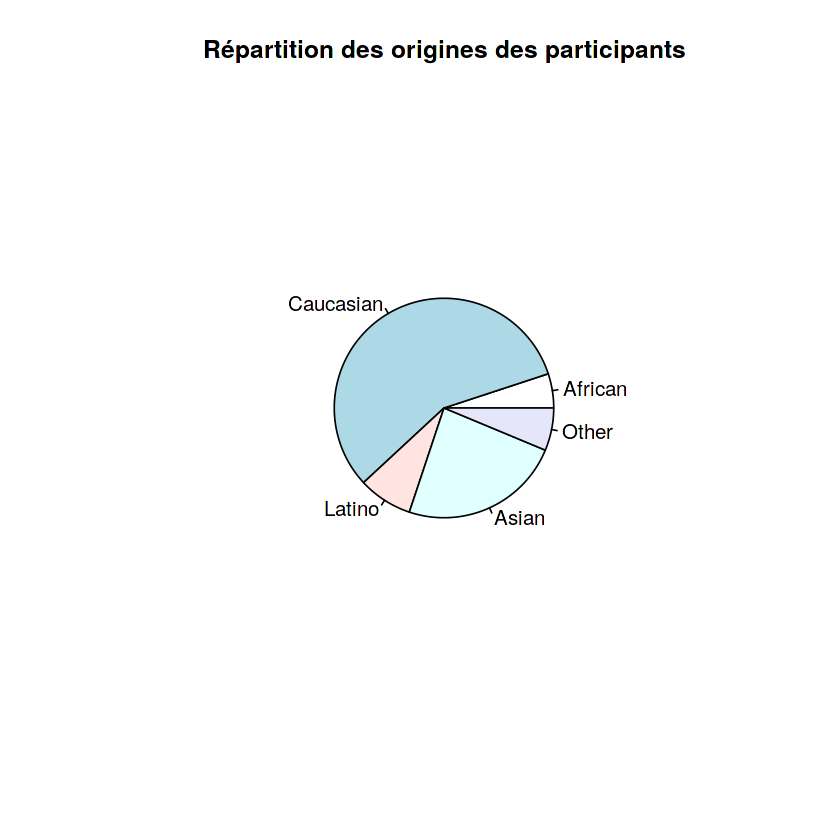

In [10]:
table_race = table(data$race)
race_names_ = c("African","Caucasian","Latino","Asian","Other")
pie(table_race, labels=race_names_, main="Répartition des origines des participants")

<a id="Domaine d'étude des participants"></a>
>> ## 1.3 Domaine d'étude des participants

Les individus ont un background assez varié. 

On remarque cependant que les étudiants en business sont légèrement majoritaires.

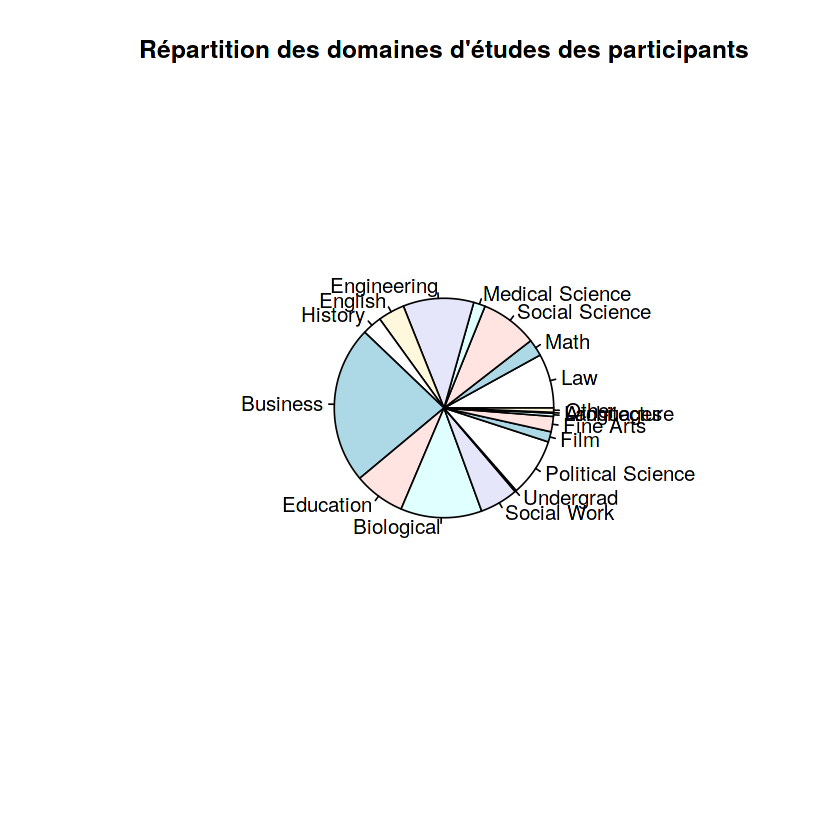

In [11]:
table_field = table(data$field_cd)
field_names_ = c("Law","Math","Social Science", 
                 "Medical Science", 
                 "Engineering","English", 
                 "History", 
                 "Business", 
                 "Education", 
                 "Biological",
                 "Social Work",
                 "Undergrad" ,
                 "Political Science", 
                 "Film",
                 "Fine Arts",
                 "Languages",
                 "Architecture",
                 "Other")
pie(table_field, labels = field_names_, main="Répartition des domaines d'études des participants")

<a id="Objectifs des participants"></a>
>> ## 1.4 Objectif des participants

Les participants sont majoraritairement venus sans prise de tête: pour s'amuser et rencontrer de nouvelles personnes.

On remarque que très peu de gens viennent dans la recherche d'une relation sérieuse.

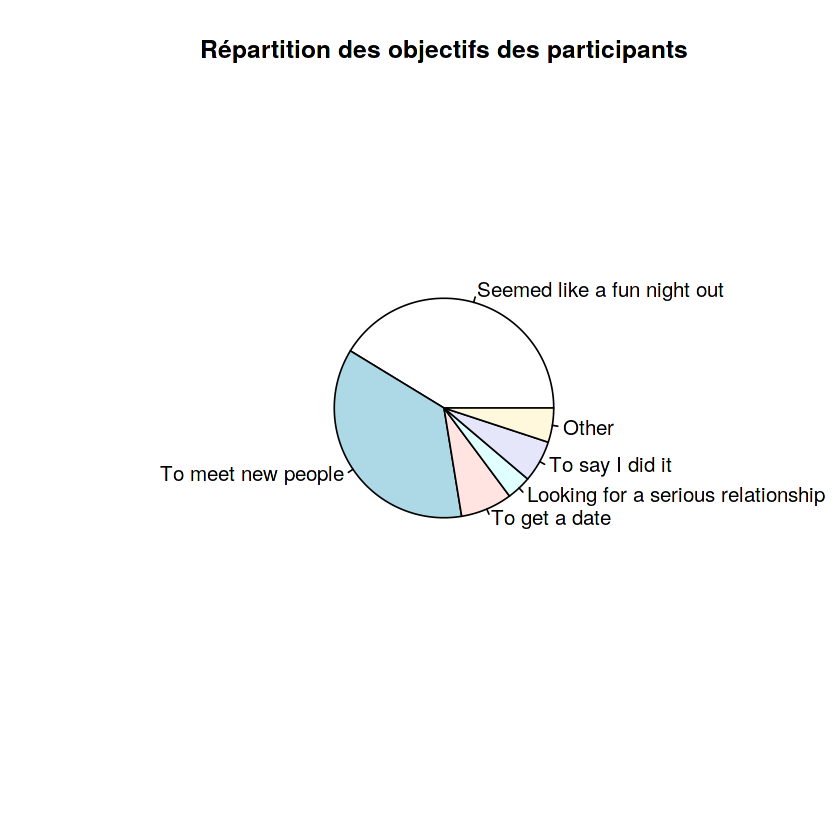

In [12]:
table_goal = table(data$goal)
goal_names_ = c("Seemed like a fun night out",
                "To meet new people",
                "To get a date",
                "Looking for a serious relationship",
                "To say I did it",
                "Other")
pie(table_goal, labels= goal_names_, main="Répartition des objectifs des participants")

<a id="Habitude de vie des participants"></a>
>> ## 1.5 Habitude de vie des participants

Les expériences amoureuses sont très variés chez les individus.

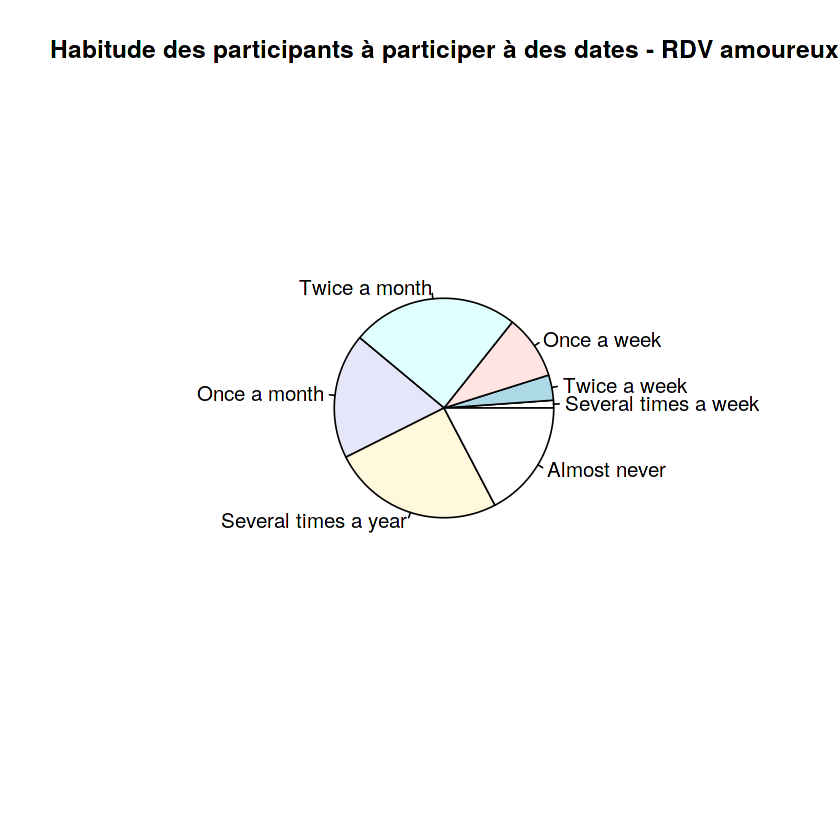

In [13]:
table_date = table(data$date)
date_names_ = c("Several times a week",
                "Twice a week", 
                "Once a week",
                "Twice a month",
                "Once a month", 
                "Several times a year",
                "Almost never")

pie(table_date, labels= date_names_, main="Habitude des participants à participer à des dates - RDV amoureux")

La majorité des personnes sortent une à plusieurs fois par semaine.

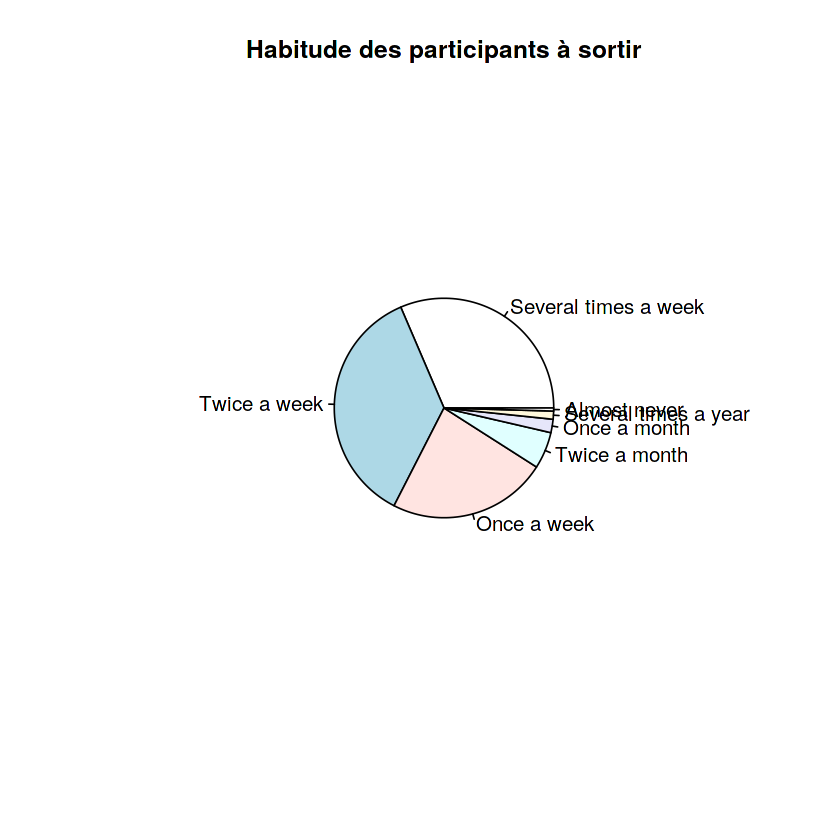

In [14]:
table_goout = table(data$go_out)
goout_names_ = c("Several times a week",
                "Twice a week", 
                "Once a week",
                "Twice a month",
                "Once a month", 
                "Several times a year",
                "Almost never")

pie(table_goout, labels= goout_names_, main="Habitude des participants à sortir")

<a id="Corrélation"></a>
>> ## 1.6 Corrélation entre le domaine d'étude et les habitudes de vie - ACM

Pour essayer d'observer une potentielle corrélation, on peut lancer une AFC (Analyse Factorielle des Correspondances).

Y'a-t-il une liaison entre le domaine d'étude et la fréquence de sortie des participants ?
On s'assure que la liaison existe bien avec un test du khi-deux sur l'indépendance.

In [15]:
chisq.test(data$go_out, data$field_cd)


	Pearson's Chi-squared test

data:  data$go_out and data$field_cd
X-squared = 1609.1, df = 102, p-value < 2.2e-16


In [16]:
goout_field = table(data$go_out, data$field_cd)
colnames(goout_field) = field_names_
rownames(goout_field) = goout_names_
goout_field = goout_field[-c(6,7),-c(12,18)]

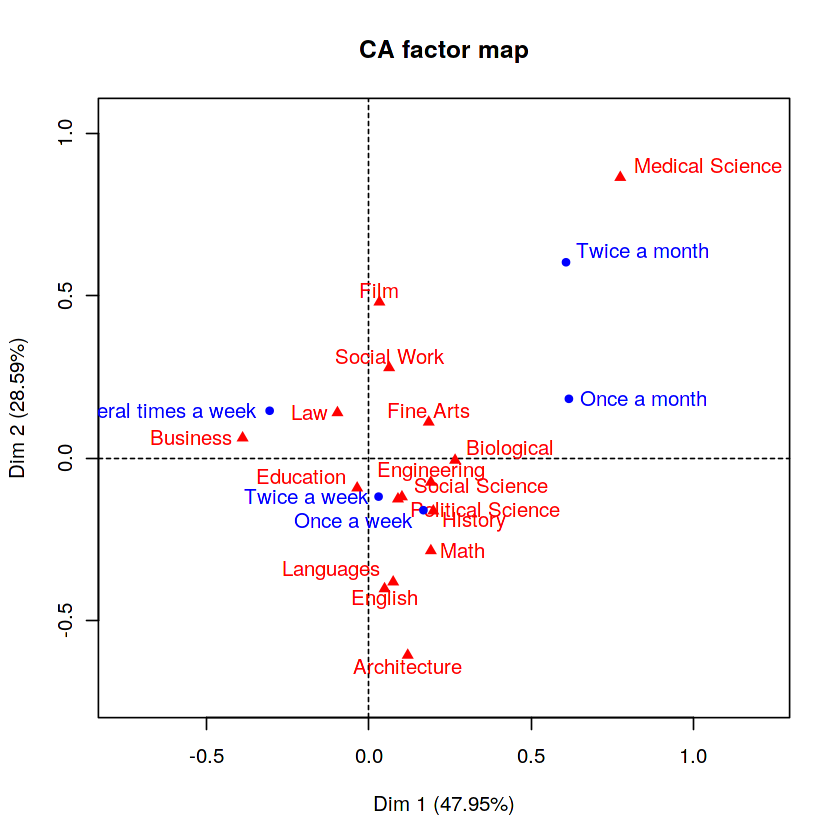

In [17]:
res = CA(goout_field)

On observe que:
* ce sont étudiants en business et en droit qui sortent en général le plus
* ce sont les étudiants en médecine qui sortent le moins

Y'a-t-il une liaison entre le domaine d'étude et les objectifs des étudiants dans la soirée ?

In [18]:
chisq.test(data$goal, data$field_cd)


	Pearson's Chi-squared test

data:  data$goal and data$field_cd
X-squared = 1750.9, df = 85, p-value < 2.2e-16


In [19]:
goal_field = table(data$goal, data$field_cd)
colnames(goal_field) = field_names_
rownames(goal_field) = goal_names_

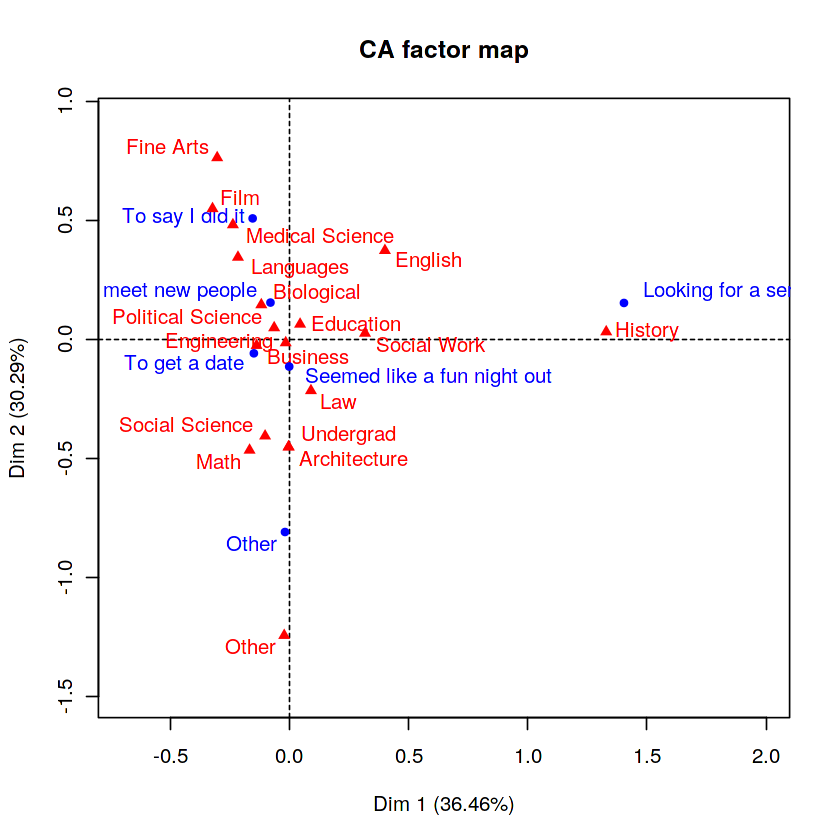

In [20]:
res = CA(goal_field)

Il semble assez difficile d'extraire de l'information.

Mais on peut observer que les étudiants d'histoire recherchent plus une relation sérieuse que les autres.
On peut aussi penser que les étudiants en commerce recherche plus à décrocher un rendez vous à la fin de l'évenement.

Avant le début de l'évenement, les étudiants ont été interrogés quant à l'importance des origines lorsqu'ils recherchaient un partenaire.

<a id="Importance"></a>
>> ## 1.7 Importance des origines éthniques et religieuses

In [21]:
# How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?
table(data$gender, data$imprace)

   
       0    1    2    3    4    5    6    7    8    9   10
  0    8 1189  563  450  276  351  208  159  426  294  201
  1    0 1609  391  533  234  306  316  384  237  115   49

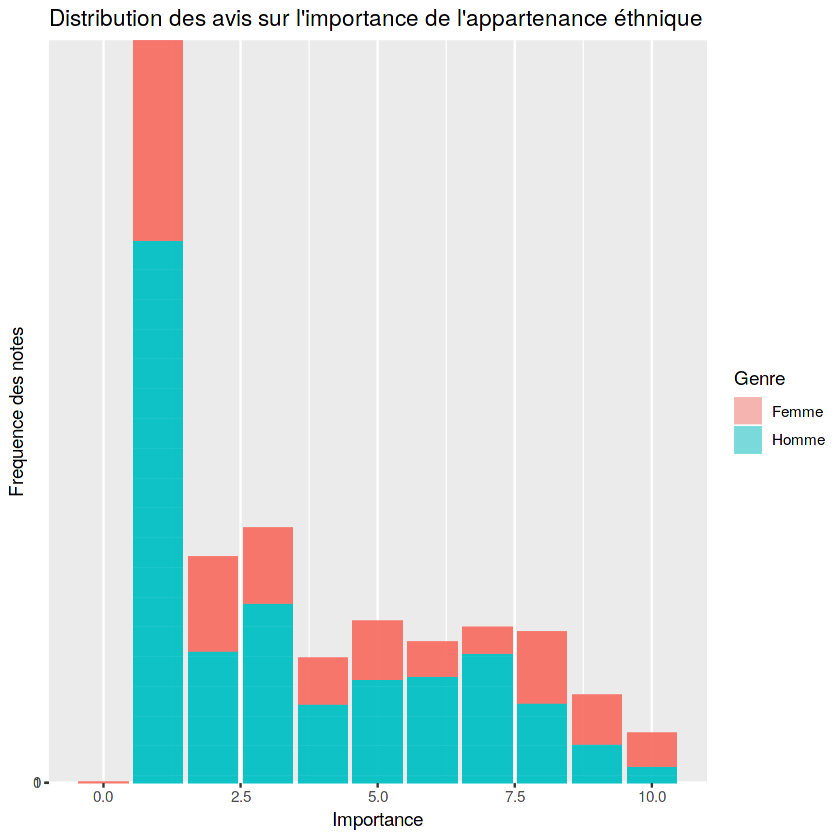

In [22]:
ggplot(data, aes(x=imprace, y=gender, fill=gender)) + 
    geom_bar(stat="identity", alpha=0.5) +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution des avis sur l'importance de l'appartenance éthnique",x="Importance", y = "Frequence des notes") 

On observe que pour la majorité des individus l'appartenance ethnique n'est pas si importante.

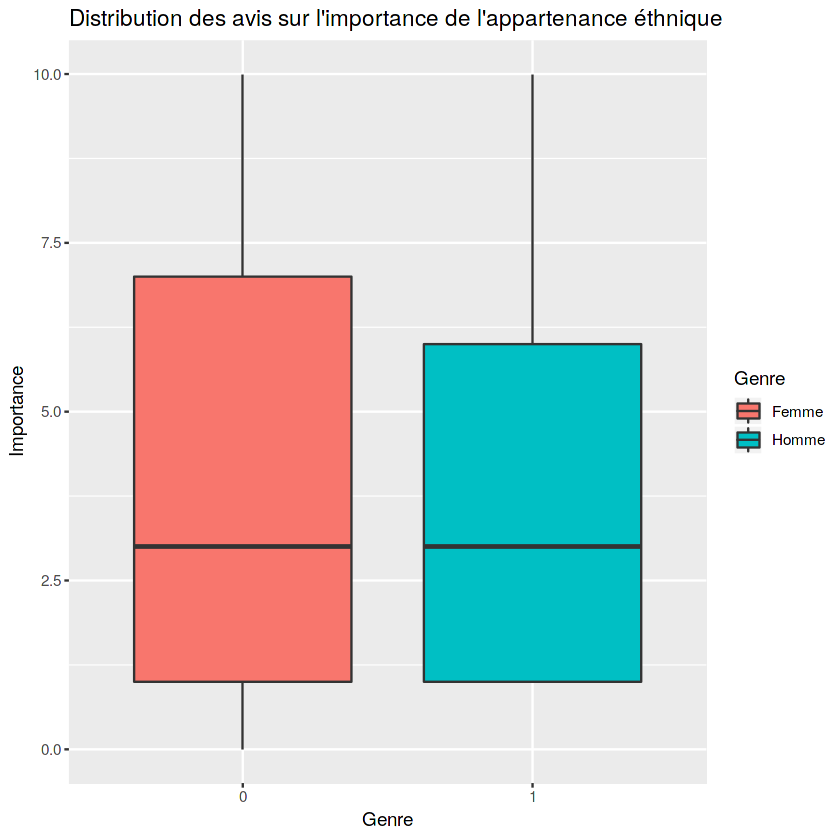

In [23]:
out = na.omit(data.frame(data$imprace, data$gender))
ggplot(out, aes(x=data.gender, y=data.imprace, fill=data.gender)) + 
  geom_boxplot() +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution des avis sur l'importance de l'appartenance éthnique",x="Genre", y = "Importance") 

In [24]:
t.test(out$data.imprace ~ out$data.gender)


	Welch Two Sample t-test

data:  out$data.imprace by out$data.gender
t = 10.371, df = 8119.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5225186 0.7660935
sample estimates:
mean in group 0 mean in group 1 
       4.108848        3.464542 


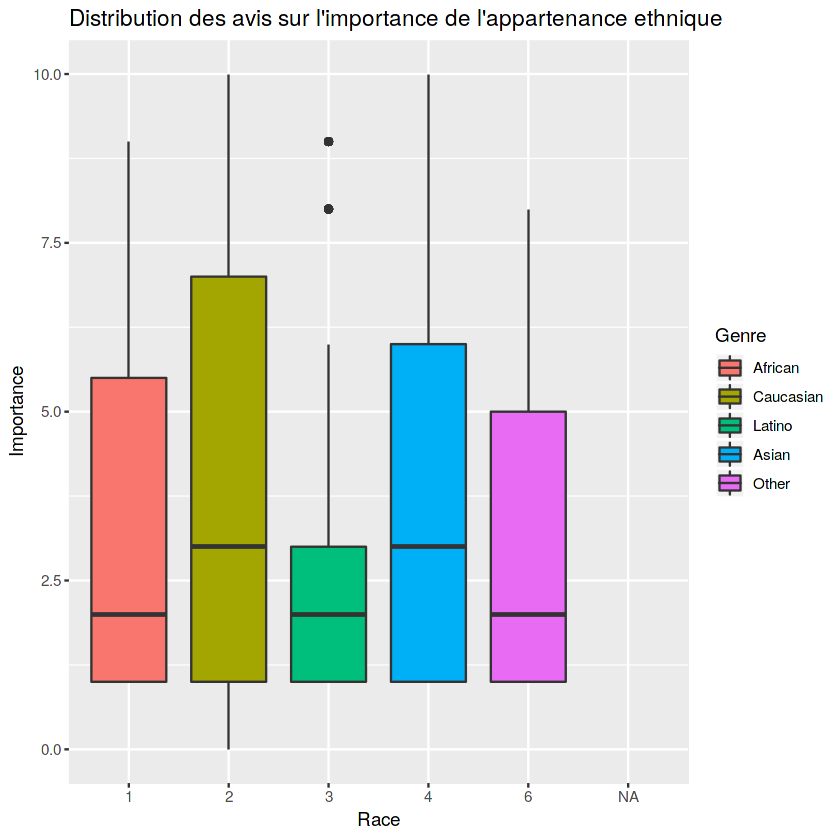

In [25]:
ggplot(data, aes(x=race, y=imprace, fill=race)) + 
  geom_boxplot() +     
    scale_fill_discrete(name = "Genre", labels =  c("African","Caucasian","Latino","Asian","Other")) +
    labs(title="Distribution des avis sur l'importance de l'appartenance ethnique",x="Race", y = "Importance") 

On voit que les américains caucasiens et les asiatiques accordent plus d'importance à l'appartenance raciale.

On peut ensuite se poser les mêmes questions quant à l'appartenance religieuse.

In [26]:
# How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?
table(data$gender, data$imprelig)

   
       1    2    3    4    5    6    7    8    9   10
  0 1069  498  483  323  443  319  222  310  168  290
  1 1963  365  446  201  254  342  245  207  114   37

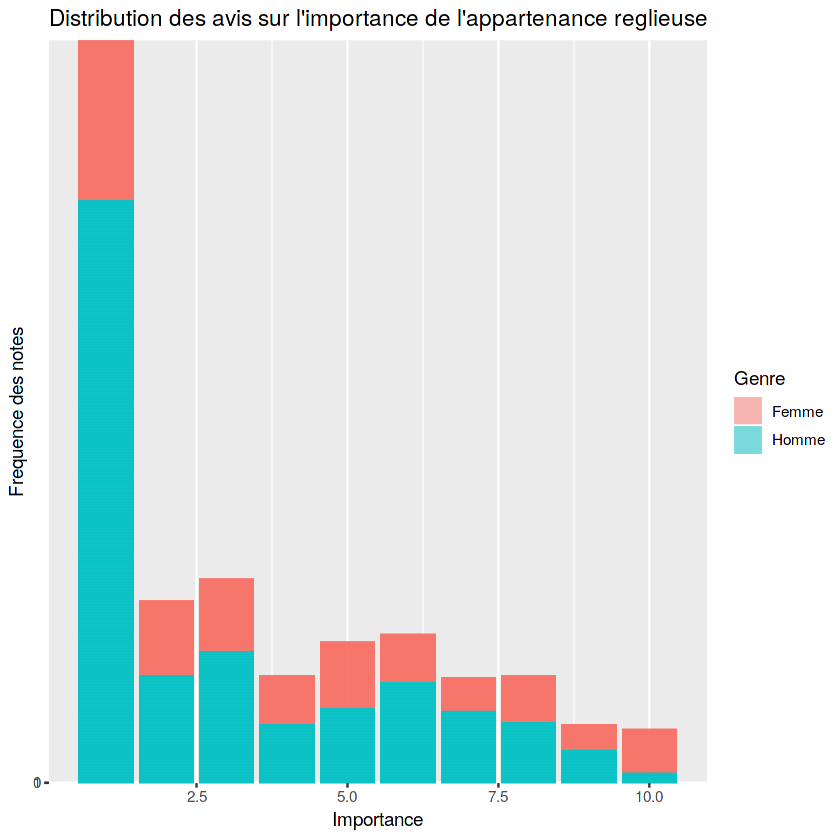

In [27]:
ggplot(data, aes(x=imprelig, y=gender, fill=gender)) + 
    geom_bar(stat="identity", alpha=0.5) +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution des avis sur l'importance de l'appartenance reglieuse",x="Importance", y = "Frequence des notes")

De même, les hommes et les femmes disent ne pas prêter attention à l'appartenance religieuse.

<a id="Attentes"></a>
>> ## 1.8 Attentes des différents participants

In [28]:
# Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
# during the speed-dating event?
table(data$gender, data$exphappy)

   
       1    2    3    4    5    6    7    8    9   10
  0  106  231  349  578 1063  917  586  158   88   27
  1   10   66  357  215  970 1086  889  355  128   98

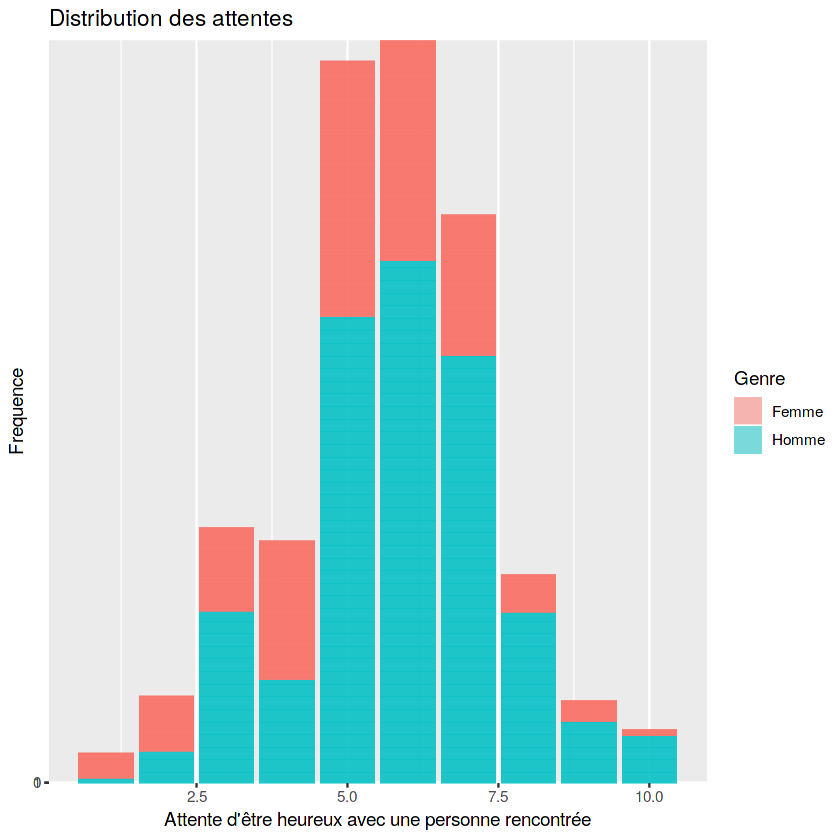

In [29]:
ggplot(data, aes(x=exphappy, y=gender, fill=gender)) + 
    geom_bar(stat="identity", alpha=0.5) +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution des attentes",x="Attente d'être heureux avec une personne rencontrée", y = "Frequence")

En général, les gens pensent qu'ils seront moyennement heureux avec leur partenaire rencontré lors de l'évenement. Les hommmes ont plus d'attentes que les femmes

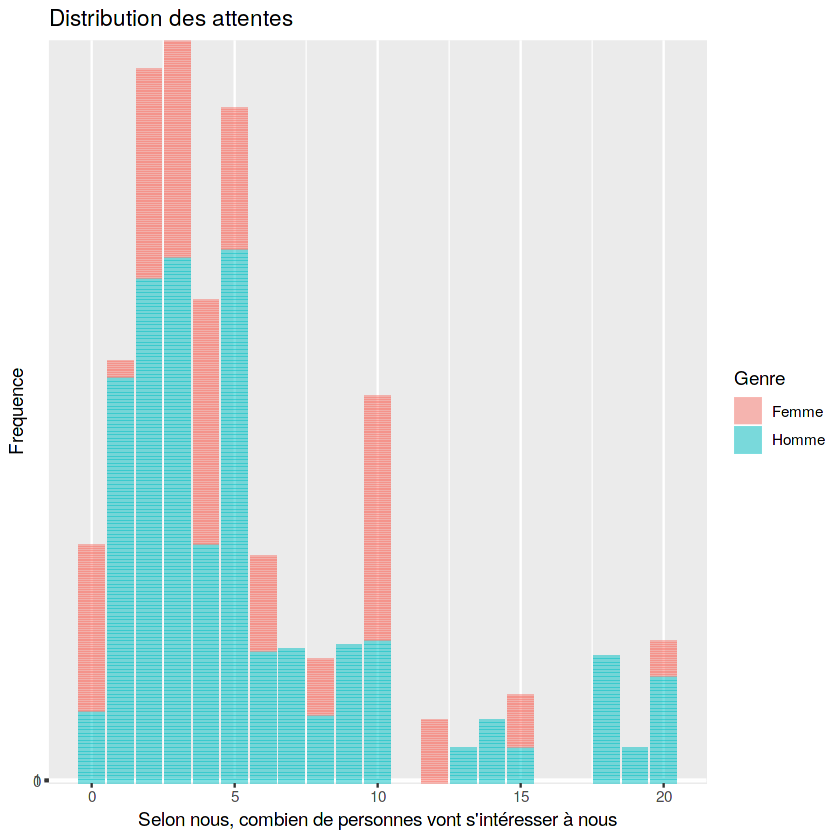

In [30]:
ggplot(data, aes(x=expnum, y=gender, fill=gender)) + 
    geom_bar(stat="identity", alpha=0.5) +
    scale_fill_discrete(name = "Genre", labels = c("0" = "Femme","1"= "Homme")) +
    labs(title="Distribution des attentes",x="Selon nous, combien de personnes vont s'intéresser à nous", y = "Frequence")

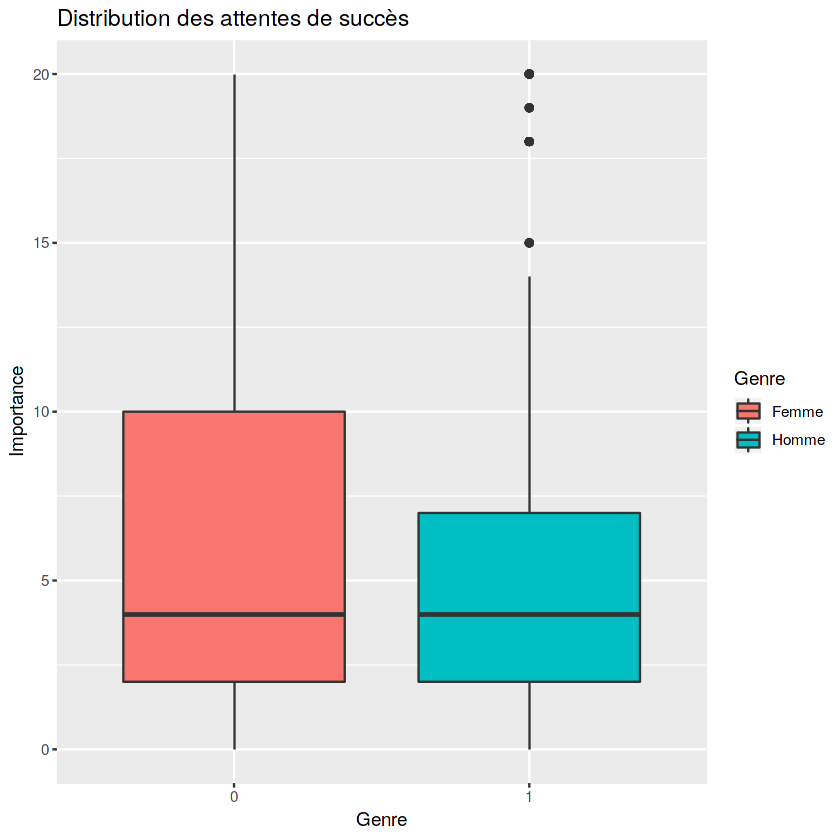

In [31]:
out = na.omit(data.frame(data$expnum, data$gender))
ggplot(out, aes(x=data.gender, y=data.expnum, fill=data.gender)) + 
  geom_boxplot() +     
    scale_fill_discrete(name = "Genre", labels =  c("Femme","Homme")) +
    labs(title="Distribution des attentes de succès",x="Genre", y = "Importance") 

In [32]:
t.test(out$data.expnum ~ out$data.gender)


	Welch Two Sample t-test

data:  out$data.expnum by out$data.gender
t = -0.51228, df = 1788.4, p-value = 0.6085
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5533956  0.3241762
sample estimates:
mean in group 0 mean in group 1 
       5.511468        5.626078 


Il n'y a pas de différence significative entre les attentes des hommes et les attentes des femmes.

<a id="Statistique Descriptive - Centres d'interêt des participants"></a>
> # 2. Statistique Descriptive - Centres d'interêt des participants

Les participants ont noté sur une échelle de $1$ à $10$ leur interet dans de divers domaines.

On peut se demander si ces interets diffèrent en fonction des hommes et des femmes.

On peut également se demander si ces interets sont corrélés entre eux.

<a id="Analyse descriptive univariée et bivariées des données"></a>
>> ## 2.1 Analyse descriptive univariée et bivariées des données

In [33]:
interest_by_gender_01 = cbind(data[3], data[51:53])
interest_by_gender_02 = cbind(data[3], data[54:58])
interest_by_gender_03 = cbind(data[3], data[60:63])
interest_by_gender_04 = cbind(data[3], data[64:66])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


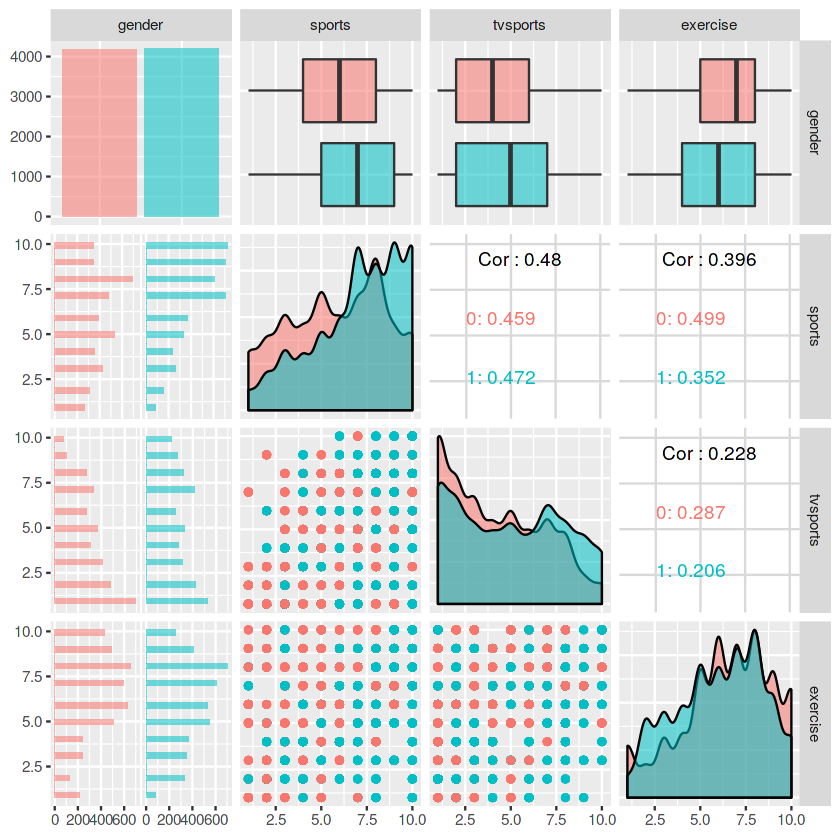

In [34]:
ggpairs(interest_by_gender_01, aes(colour = interest_by_gender_01$gender, alpha = 0.4) )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


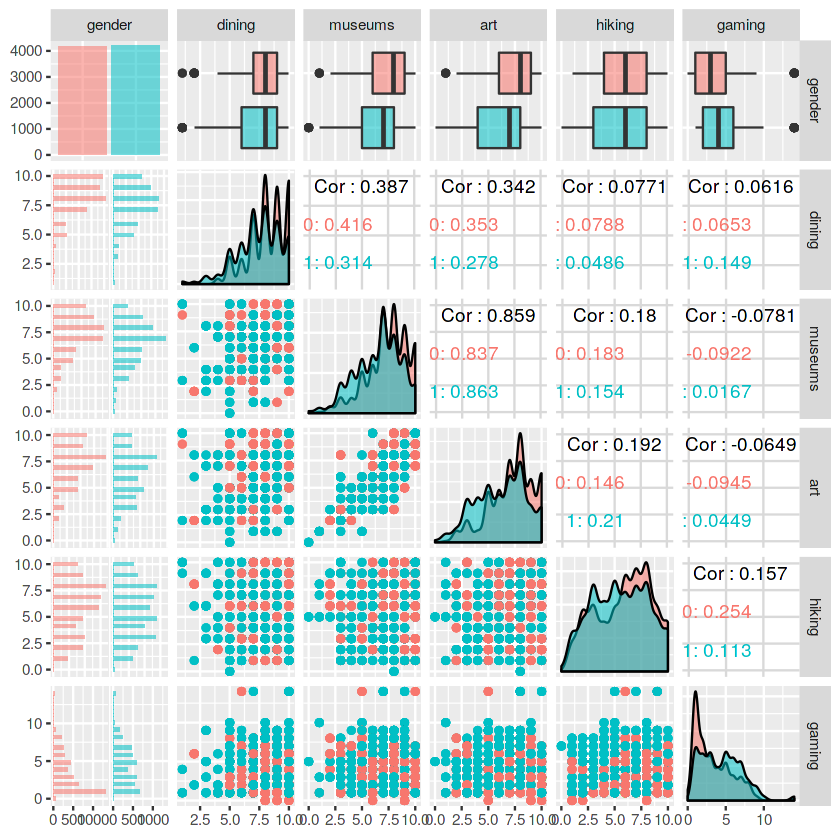

In [35]:
ggpairs(interest_by_gender_02, aes(colour = interest_by_gender_02$gender, alpha = 0.4) )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


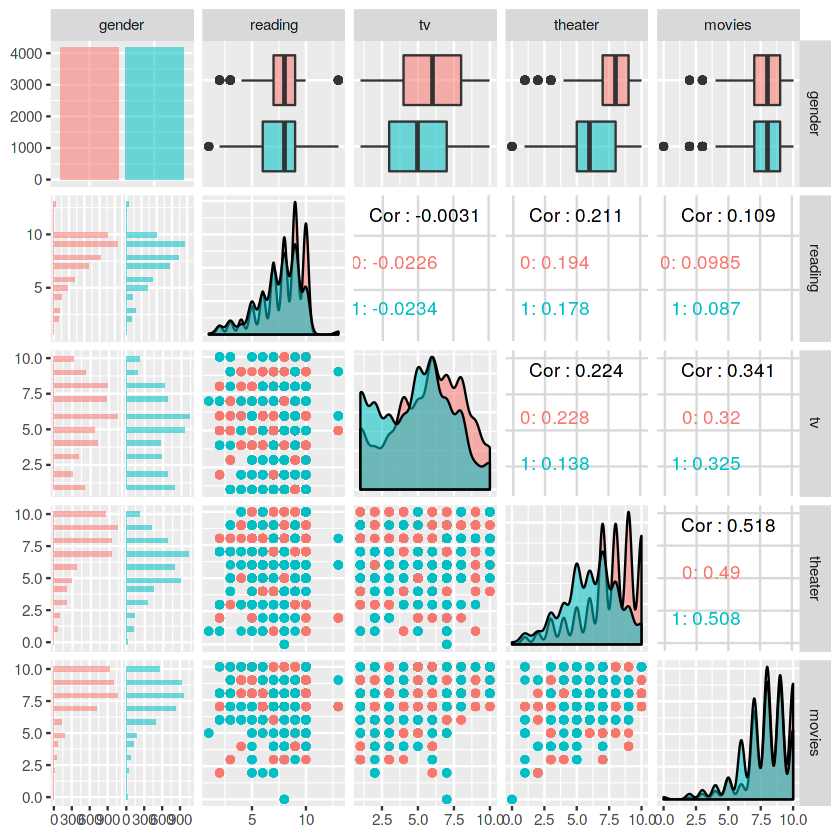

In [36]:
ggpairs(interest_by_gender_03, aes(colour = interest_by_gender_03$gender, alpha = 0.4) )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


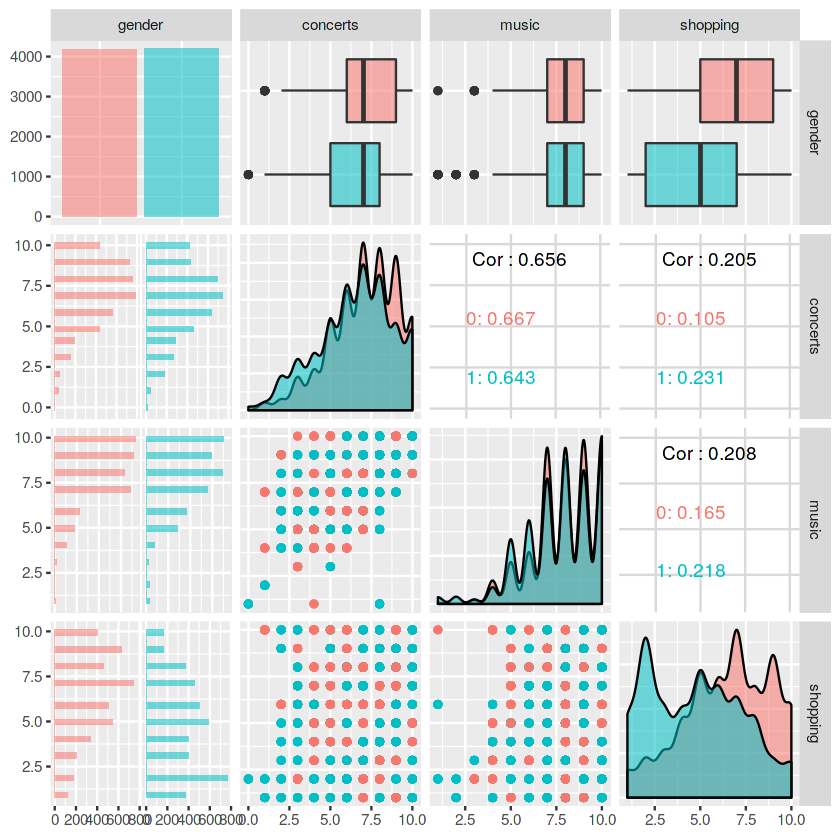

In [37]:
ggpairs(interest_by_gender_04, aes(colour = interest_by_gender_04$gender, alpha = 0.4) )

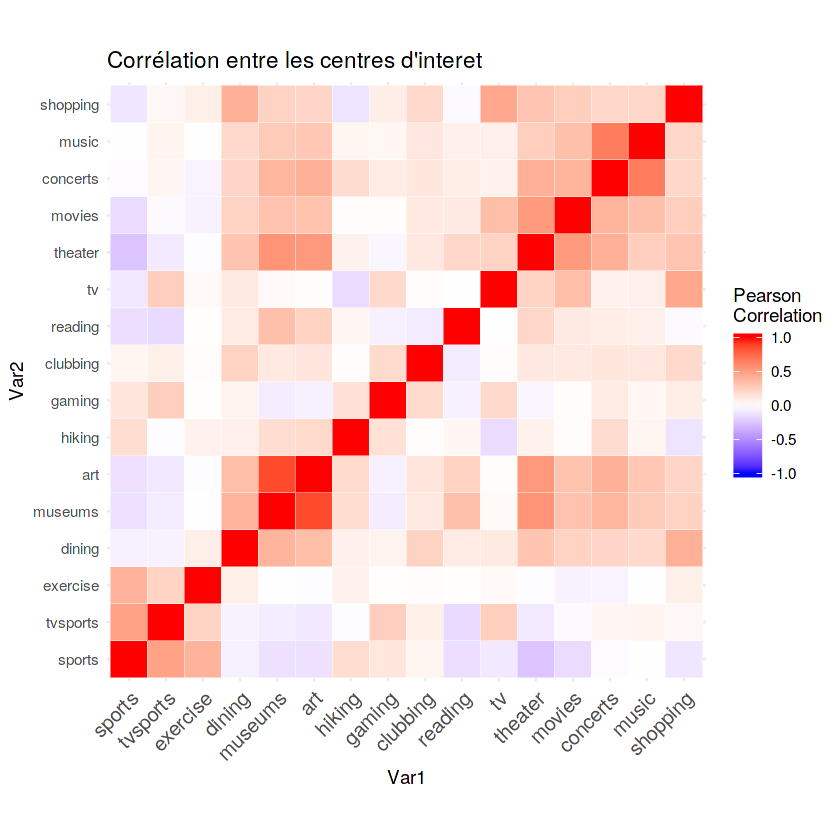

In [38]:
# Matrice de corrélation
interest = cbind( data[51:66])
cor_interest = cor(interest, use = "complete.obs")
library(reshape2)
melted_cor_interest <- melt(cor_interest)

ggplot(data = melted_cor_interest, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1), space = "Lab", name="Pearson\nCorrelation") +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1)) +
    labs(title="Corrélation entre les centres d'interet") +
    coord_fixed() 

On observe que pour certains domaines l'intérêt des femmes est plus élévé que les hommes comme les exercices sportifs, le shopping, les musées.
Pour d'autres domaines comme le sport et le sport à la télé, l'intérêt des hommes est plus élevé.

Par la matrice de corrélation, on observe que certains centres d'intérêts sont correlés fortement entre eux comme le sport, le sport à la télé et les exercices sportifs. D'autres domaines sont corrélés négativement comme le sport et le théâtre.

On observe donc bien la corrélation des centres d'interêt qui nous semble assez logique !



 <a id="ACP"></a>
 >> ## 2.2 Analyse par composantes principales - ACP

L'ACP permet de résumer aux mieux nos variables "Centres d'intérêt" pour mieux observer les éventuelles corrélations.

In [39]:
pca_interest <- PCA(interest)

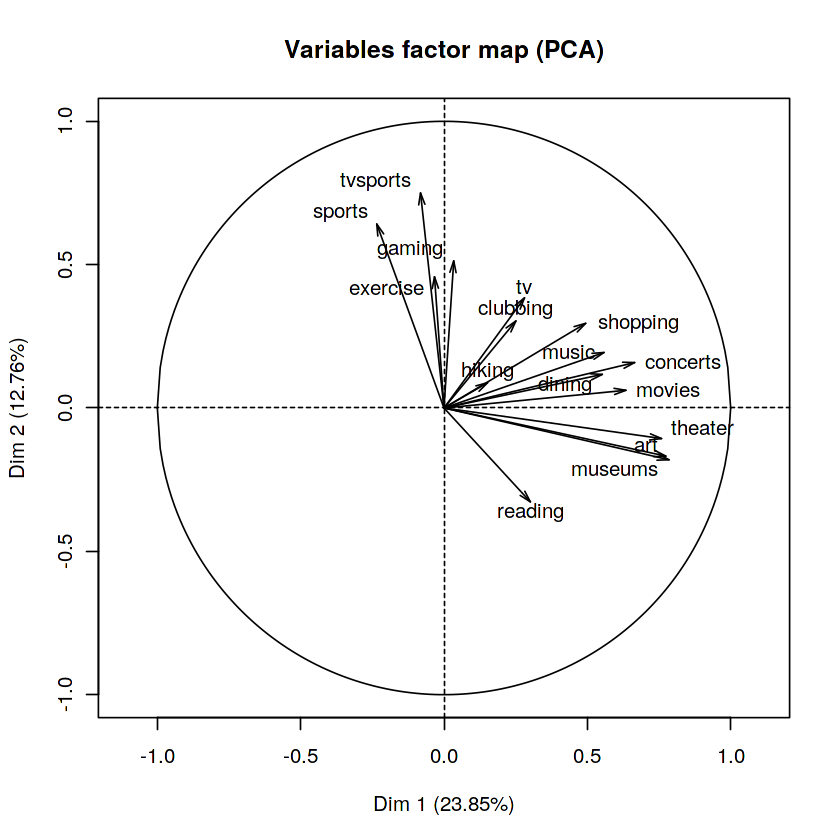

In [40]:
plot(pca_interest, choix = "var")

On observe que les variables sont en général mal représentées dans le cercle de corrélation. Il faut donc faire attention à l'interprétation.

Cependant en observant les positions des variables les unes par rapport aux autres, on observe que "tv sport, sport et exercise" sont assez proche, cela renforce l'information que l'on a obtenu sur la heatmap.

De plus on voit qu'elle sont dans la direction opposée aux centres d'intérêts litéraires "theater, art, museums, reading".

Le bloc "sport" et le bloc "literaire" sont bien correlés négativement entre eux.

<a id="Influence de la prise de décision"></a>
> # 3. Influence de la prise de décision

<a id="Statistique descriptive des facteurs influencantes"></a>
>> ## 3.1 Statistique descriptive des facteurs influencantes

On peut maintenant se demander quels sont les facteurs qui influencent notre prise de décision.

Ce sont des variables quantitatives qui prennent des valeurs entre $1$ et $10$.

| Facteurs influencantes       | Signification                               |
| --------------------------- |:-------------------------------------------:| 
| attr                     | attractivité                       | 
| sinc                        | sincérité            |
| intel                        | intelligence                       | 
| fun                       | amusant                    |
| amb                        | ambitieux           |
| shar                      | interêts communs                         |   
| like                    | appréciation                     | 

In [41]:
table(data$gender, data$dec)

   
       0    1
  0 2655 1529
  1 2205 1989

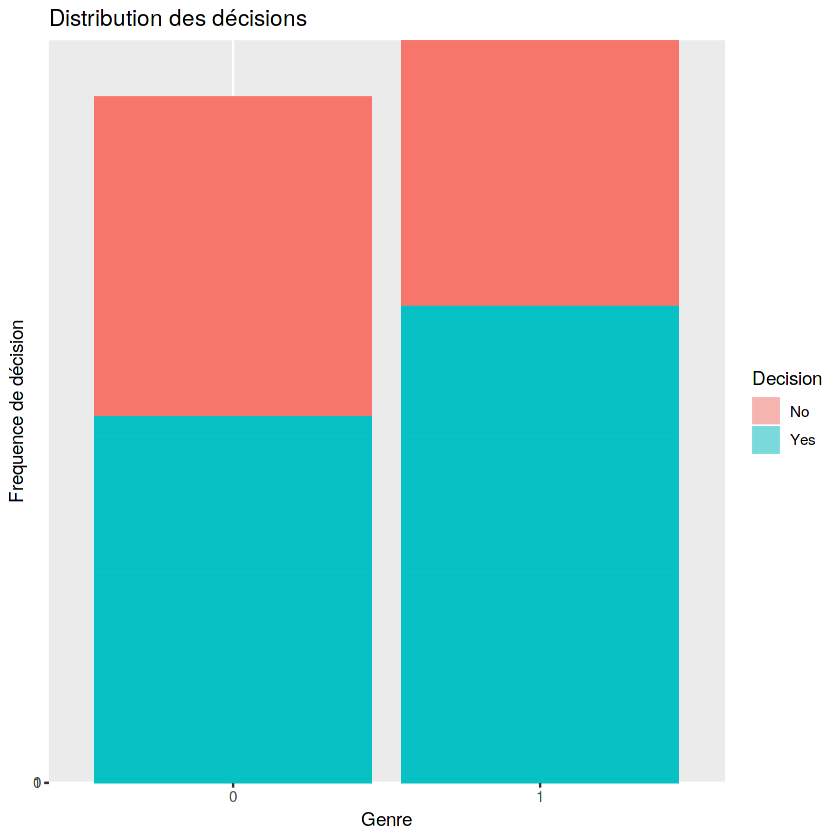

In [42]:
ggplot(data, aes(x=gender, y=dec, fill=dec)) + 
    geom_bar(stat="identity", alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Distribution des décisions",x="Genre", y = "Frequence de décision") 

In [43]:
out = table(data$dec, data$gender)
colnames(out) = c('Femme', 'Homme')
rownames(out) = c('Non', 'Oui')
Out = out[2,] / table(data$gender)
rownames(Out) =  c('Femme', 'Homme')
Out


    Femme     Homme 
0.3654398 0.4742489 

On voit que les hommes ont plus tendance à être intéréssé par un autre rendez-vous !

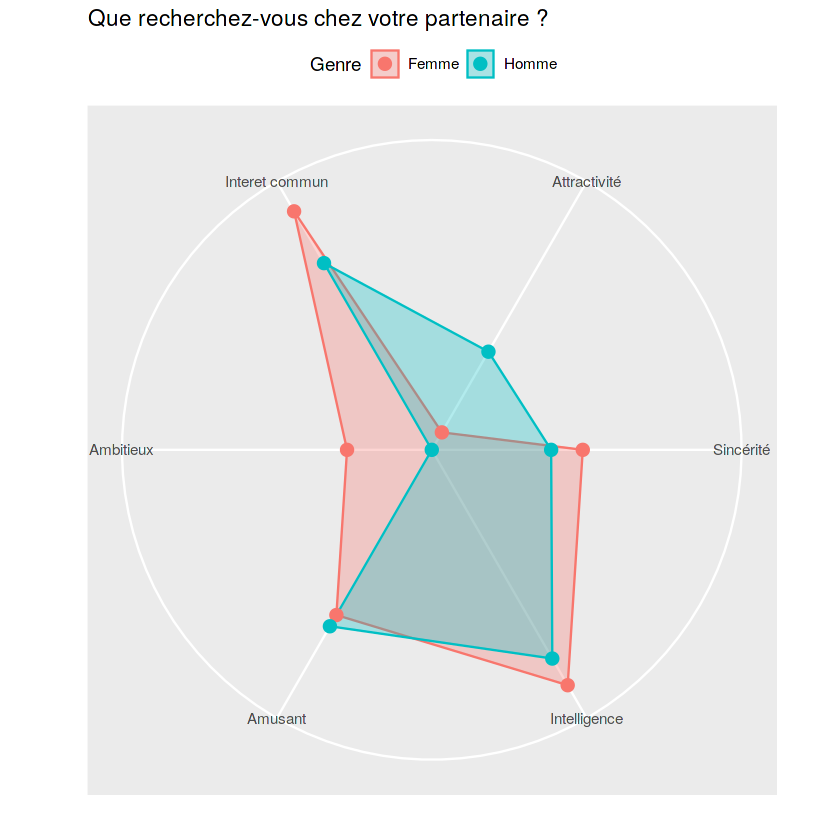

In [44]:
out = data.frame(data[3], data[70:75])
colnames(out) <- c("Genre", "Attractivité", "Sincérité", "Intelligence", "Amusant", "Ambitieux","Interet commun")
#colnames(out)
out$Genre = factor(out$Genre, levels=c(0,1), labels=c("Femme","Homme"))
ggRadar(out, aes(group = Genre), use.label = FALSE)  + scale_y_discrete(breaks = NULL) + 
    ggtitle("Que recherchez-vous chez votre partenaire ?")
out1 = out

Les critères entre les hommes et les femmes sont très différents à priori.

Les hommes disent accorder beaucoup d'importance à l'attractivité contrairement aux femmes.

L'ambition est un critère qui n'est pas recherché chez un partenaire, encore moins pour l'homme que pour la femme.
À priori, d'après les dires des participants, ceux-ci cherchent à rencontrer des personnes amusantes, intelligentes et avec des intérêts communs.

In [45]:
out = data.frame(data[3], data[98], data[99:104])
#out = out[out$dec == 1,]
#out = out[-2]
#out$Genre = factor(out$Genre, levels=c(0,1), labels=c("Femme","Homme"))

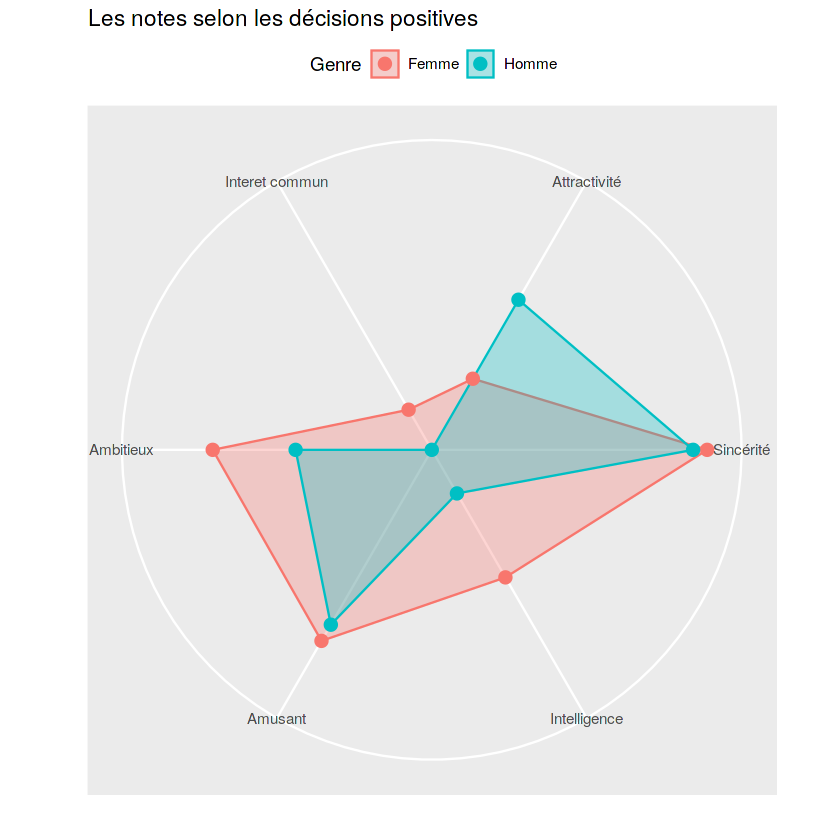

In [46]:
out = data.frame(data[3], data[98], data[99:104])
colnames(out) <- c("Genre", "dec", "Attractivité", "Sincérité", "Intelligence", "Amusant", "Ambitieux","Interet commun")
out = out[out$dec == 1,]
out = out[-2]
out$Genre = factor(out$Genre, levels=c(0,1), labels=c("Femme","Homme"))
ggRadar(out, aes(group = Genre), use.label = FALSE)  + scale_y_discrete(breaks = NULL) + 
    ggtitle("Les notes selon les décisions positives")

La prise de décision est accompagnée d'une note sur une échelle de 1 à 10 pour les différents critères.

On observe que les femmes sont beaucoup plus exigeantes que les hommes en général.

On observe qu'un des critère les plus importants dans la prise de décision est la sincérité.
On remarque aussi l'importance de l'ambition et de l'humour.
Nous savons que ces variables influencent la prise dé décision mais nous ne savons pas encore si cette influence est positive ou négative, c'est ce que nous déterminerons avec la régression logistique.

In [47]:
## Moyenne du nombre de décision positive dans les 5 classes

out = table(data$dec, data$race)
#colnames(out) = c('Femme', 'Homme')
rownames(out) = c('Non', 'Oui')
Out = out[2,] / table(data$race)
#rownames(Out) =  c('Femme', 'Homme')
Out


        1         2         3         4         6 
0.5071429 0.3898879 0.4051205 0.4611504 0.4961686 

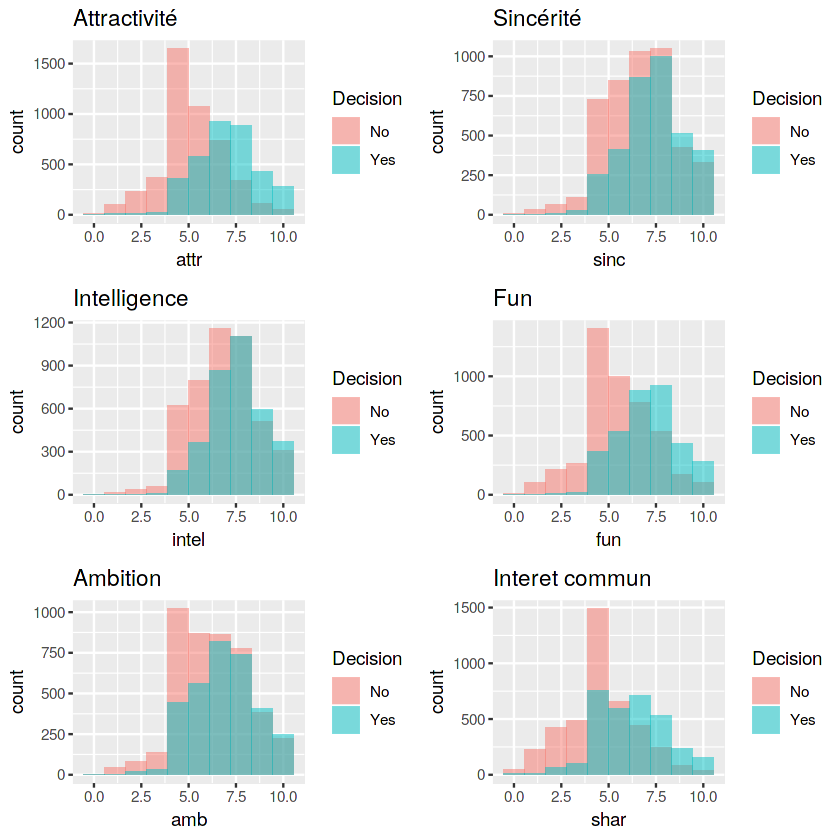

In [48]:
a = ggplot(data, aes(x=attr, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Attractivité") 

b = ggplot(data, aes(x=sinc, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Sincérité") 

c = ggplot(data, aes(x=intel, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Intelligence")

d = ggplot(data, aes(x=fun, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Fun")

e = ggplot(data, aes(x=amb, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Ambition")

f = ggplot(data, aes(x=shar, color= , fill=dec)) +
    geom_histogram(position="identity", bins = 10, , alpha=0.5) +
    scale_fill_discrete(name = "Decision", labels = c("0" = "No","1"= "Yes")) +
    labs(title="Interet commun")

library(gridExtra)
grid.arrange(a, b, c, d ,e, f, ncol= 2, nrow = 3)

In [49]:
decision_based_attribute = cbind(data[99:106])

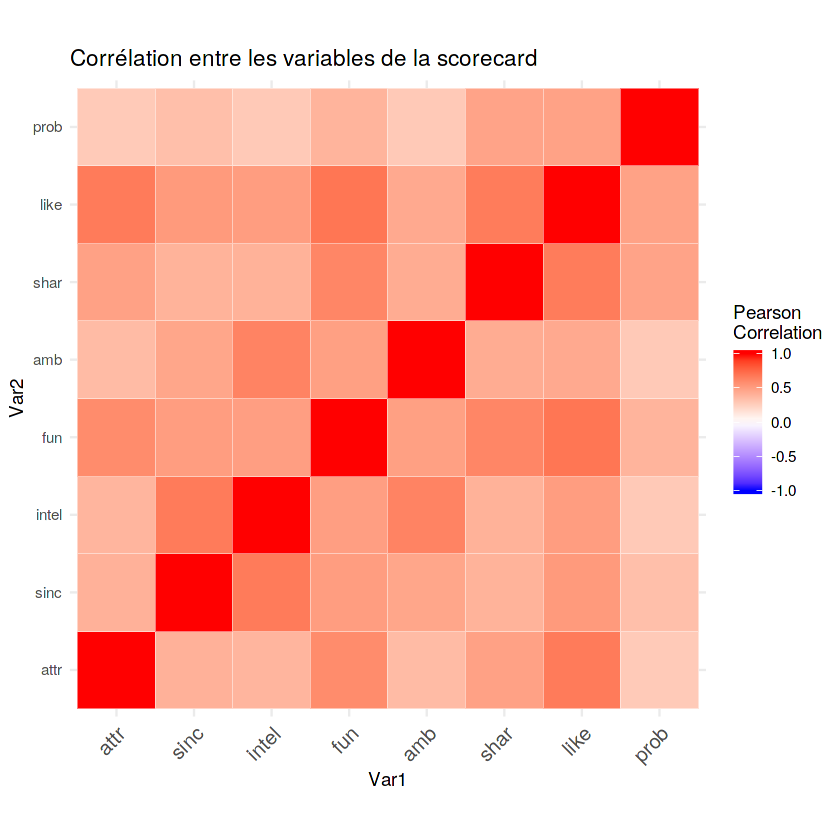

In [50]:
# Matrice de corrélation
cor_decision_based_attribute = cor(decision_based_attribute, use = "complete.obs")
melted_cor_decision_based_attribute <- melt(cor_decision_based_attribute)


ggplot(data = melted_cor_decision_based_attribute, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1), space = "Lab", name="Pearson\nCorrelation") +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1)) +
    labs(title="Corrélation entre les variables de la scorecard") +
    coord_fixed() 

On observe que les variables sont soit faiblement correlés soit correlés positivement.

In [51]:
pca_attribute <- PCA(decision_based_attribute)

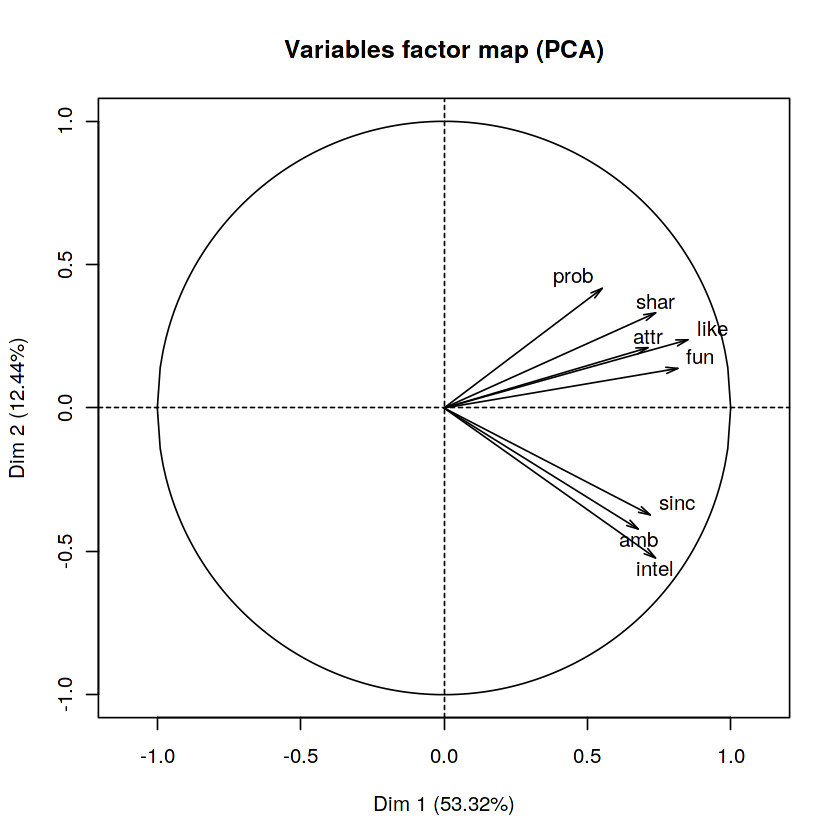

In [52]:
plot(pca_attribute,choix="var")

<a id="Classification non supervisée"></a>
>> ## 3.2 Classification non supervisée

On peut se demander:
* si il y a des individus qui se ressemblent
* quelles caractéristiques ont-ils en commun

On va utiliser deux méthodes de clustering:
* K means
* Classification ascendante hiérarchique - CAH

On commence par la méthode K means:

In [53]:
inertie.intra = rep(0, times = 10)
decision_based_attribute.cr = scale(decision_based_attribute,center=T,scale=T)
for (k in 1:10)
{
    kmeans.result = kmeans(na.omit(decision_based_attribute.cr), centers = k)
    inertie.intra[k] = kmeans.result$tot.withinss/kmeans.result$totss
}

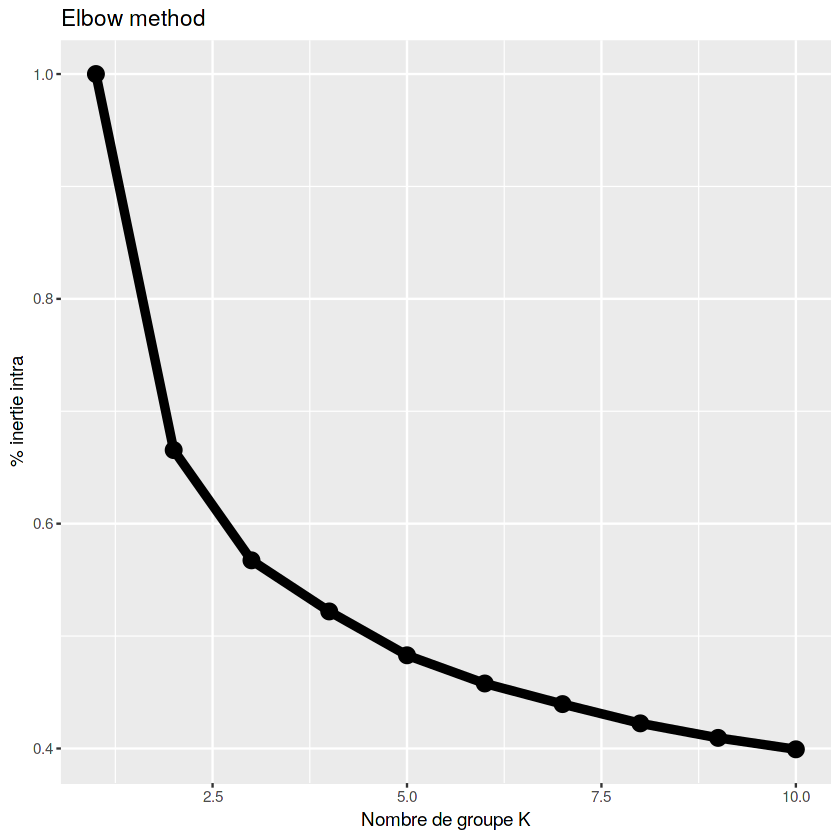

In [54]:
 ggplot() + aes(x= 1:10, y = inertie.intra) +
    geom_point(size=4) + geom_line(size=2) + 
    labs(title="Elbow method",x="Nombre de groupe K", y = "% inertie intra")

On peut choisir $K = 3$ le point à partir de laquelle l'inertie intra classe ne diminue plus considérablement.

In [55]:
K = 3
kmeans.result <- kmeans(na.omit(decision_based_attribute),centers=K)
col=kmeans.result$cluster
decision_based_attribute = cbind(data[98:106])
out = data.frame((na.omit(decision_based_attribute)), "clusterNum" = kmeans.result$cluster)

On va essayer de caractériser ces $3$ groupes formés:

In [56]:
a = table(out$dec, out$clusterNum)
Means_groupes <- matrix(NA, nrow=K, ncol=dim(na.omit(decision_based_attribute))[2])
colnames(Means_groupes) = colnames(na.omit(decision_based_attribute))
rownames(Means_groupes) = c("Groupe 1", "Groupe 2", "Groupe 3")
for (i in 1:K)
{
    Means_groupes[i,1]<- (a[2,] / (a[1,] + a[2,]))[i]
    Means_groupes[i,2:9]<- colMeans(out[,2:9][out$clusterNum == i,])
}

In [57]:
Means_groupes 

,dec,attr,sinc,intel,fun,amb,shar,like,prob
Groupe 1,0.39210998,6.147788,7.198745,7.332636,6.373580,6.676778,5.260909,6.095637,5.035266
Groupe 2,0.09915749,4.227155,5.478613,5.930006,4.058004,5.201231,3.130266,3.857097,3.561244
Groupe 3,0.74156220,7.726326,8.358486,8.460463,8.169479,8.050386,7.506509,7.877628,6.862343


On observe que 3 groupes se distinguent:
* Le groupe 1 correspond à une bonne appréciation de la personne, mais pas assez pour garantir une décision positive
* Le groupe 2 correspond à une personne qui semble avoir une très bonne affinité avec nous, la proportition de décision positive est assez élevée.
* Le groupe 3 correspond à des personnes où il n'y a pas du tout d'affinité.

Continuons avec le CAH:

In [58]:
decision_based_attribute = cbind(data[99:106])
decision_based_attribute.cr <- scale(na.omit(decision_based_attribute),center=T,scale=T)
d.decision_based_attribute.cr <- dist(decision_based_attribute.cr)
cah.ward.cr <- hclust(d.decision_based_attribute.cr,method="ward.D2")

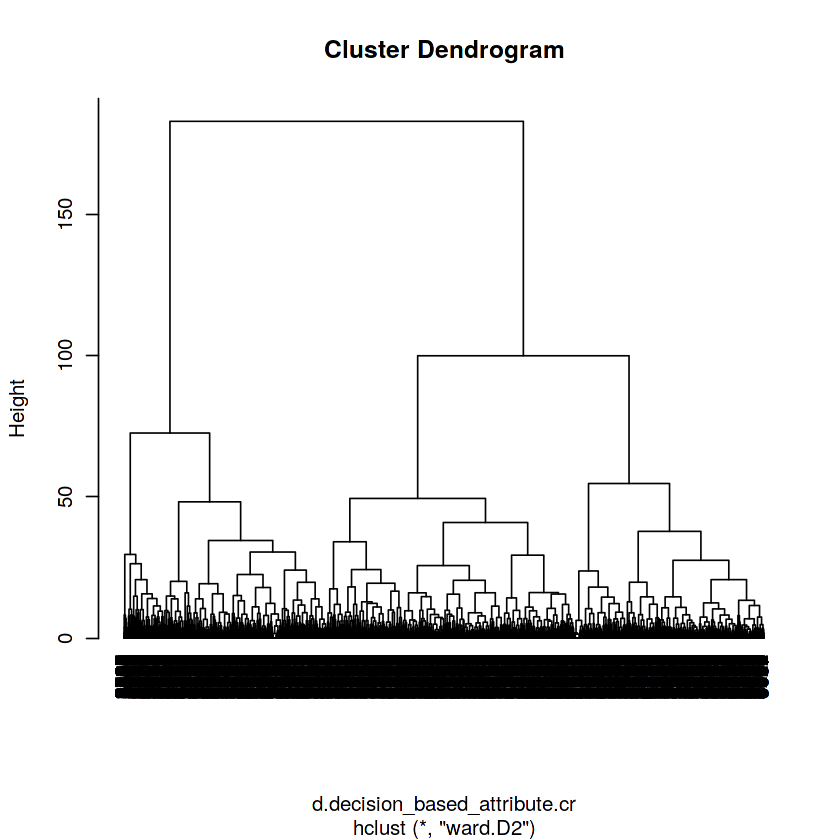

In [59]:
plot(cah.ward.cr,hang =-1)

In [60]:
dev.new()

On peut choisir $ K = 3 $ en coupant l'arborescence lorsque les branches sont jugées trop grandes.

In [61]:
decision_based_attribute = cbind(data[98:106])
out = data.frame((na.omit(decision_based_attribute)), "clusterNum" = cutree(cah.ward.cr,k=4))
a = table(out$dec, out$clusterNum)
K=3
Means_groupes <- matrix(NA, nrow=K, ncol=dim(na.omit(decision_based_attribute))[2])
colnames(Means_groupes)=colnames(na.omit(decision_based_attribute))
rownames(Means_groupes) = c("Groupe 1", "Groupe 2", "Groupe 3")
for (i in 1:K) 
{
    Means_groupes[i,1]<- (a[2,] / (a[1,] + a[2,]))[i]
    Means_groupes[i,2:9]<- colMeans(out[,2:9][out$clusterNum == i,])
}
Means_groupes

,dec,attr,sinc,intel,fun,amb,shar,like,prob
Groupe 1,0.4152700,6.143762,7.411546,7.561080,6.507076,6.911918,5.451397,6.222160,5.377840
Groupe 2,0.7283293,7.800194,8.260775,8.399516,8.127119,8.067554,7.434625,7.823341,6.589104
Groupe 3,0.2033803,5.112113,6.223380,6.459718,5.074930,5.710704,3.951549,4.836620,4.059437


Les groupes formées ont des caractéristiques similaires que ceux du K means.

<a id="Classification supervisée"></a>
> # 4. Classification Supervisée

Analyse prédictive: comparaison des méthodes de classification supervisée

On veut prédire la variable dec : would you like to see this person again en fonction des variables explicatives.

In [62]:
library(MLmetrics)
library(MASS)


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



<a id="Creation d'une echantillon de test"></a>
>> ## 4.1 Creation d'une echantillon de test

In [63]:
# Création de l'échantillon de test
set.seed(1)
n <- nrow(data)
p <- ncol(data)-1
test.ratio <- .2 # ratio of test/train samples
n.test <- round(n*test.ratio)
tr <- sample(1:n,n.test)
data.test <- data[tr,]
data.train <- data[-tr,]

* Quels sont les attributs qui comptent le plus ? L'âge ? L'ethnie ? 

* Ou alors ce sont les atouts (fun, attractive, intelligent...) ?

* Quelle est l'importance des intérêts communs et lesquels sont les plus importants ? (theater, tv...)

<a id="Régression logistique"></a>
>> ## 4.2 Régression logistique

In [64]:
res <- glm(data.train$dec~age+gender
           +age_o+race_o+
           samerace+imprelig+
           sports+tvsports+exercise+
           dining+museums+art+hiking+
           gaming+clubbing+reading+tv+
            theater+movies+concerts+
            music+shopping+yoga
           +attr+sinc+intel+fun+
           +amb+shar+like+prob+
           attr1_1+sinc1_1+intel1_1+
        +fun1_1+amb1_1+shar1_1
            ,family = binomial, data = data.train[,-98])

In [65]:
summary(res)


Call:
glm(formula = data.train$dec ~ age + gender + age_o + race_o + 
    samerace + imprelig + sports + tvsports + exercise + dining + 
    museums + art + hiking + gaming + clubbing + reading + tv + 
    theater + movies + concerts + music + shopping + yoga + attr + 
    sinc + intel + fun + +amb + shar + like + prob + attr1_1 + 
    sinc1_1 + intel1_1 + +fun1_1 + amb1_1 + shar1_1, family = binomial, 
    data = data.train[, -98])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0361  -0.7347  -0.2066   0.7629   3.5772  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.424183   1.833394  -2.413 0.015817 *  
age         -0.014299   0.010982  -1.302 0.192893    
gender1      0.458807   0.091705   5.003 5.64e-07 ***
age_o       -0.005099   0.010297  -0.495 0.620482    
race_o      -0.013491   0.029429  -0.458 0.646644    
samerace    -0.009396   0.075834  -0.124 0.901397    
imprelig    -0.059216   0.013611  -4.351 1.36e-05 ***
s

Étude de l'importance des variables avec les p-value: 
*Qu'est ce qui à l'air d'influencer la décision d'une personne selon l'importance des variables ?

Les hommes ont plus souvent tendance à choisir de revoir leur partenaire féminin
Les centres d'intérêts ont leur importance dans la décision : 
* Les personnes qui aiment les musées ont plus de mal à trouver quelqu'un qui leur correspond, pareil pour les personnes qui aiment les films.
* Les personnes qui aiment l'art, celles qui aiment les boîtes de nuit et celles qui aiment le gaming sont moins difficiles.

Les variables les plus significatives sont les notes que l'on attribue à l'autre personne avec : 
L'attractiveness, fun, share, like et prob font monter les chances de choisir de revoir cette personne.
On n'a pas envie de revoir les personnes que l'on a trouvé trop sincères ou trop ambitieuses.



In [66]:
pred_rg <- ifelse(res$fitted.values < 0.5, 0, 1)
Accuracy(y_pred = pred_rg, y_true = data.test$dec)

[1] 0.5137784

50% de bonnes prédictions, on va retirer les valeurs manquantes des données et entraîner un modèle de régression logistique Lasso.

Les valeurs manquantes ne sont pas supportées par les fonctions package glmnet (erreurs avec présence de valeurs manquantes). 

Il faut donc s'occuper des valeurs manquantes avant d'entraîner notre modèle. 


In [67]:
res_AIC <- step(res) 

Start:  AIC=5049.73
data.train$dec ~ age + gender + age_o + race_o + samerace + imprelig + 
    sports + tvsports + exercise + dining + museums + art + hiking + 
    gaming + clubbing + reading + tv + theater + movies + concerts + 
    music + shopping + yoga + attr + sinc + intel + fun + +amb + 
    shar + like + prob + attr1_1 + sinc1_1 + intel1_1 + +fun1_1 + 
    amb1_1 + shar1_1

           Df Deviance    AIC
- dining    1   4973.7 5047.7
- intel1_1  1   4973.7 5047.7
- samerace  1   4973.7 5047.7
- fun1_1    1   4973.8 5047.8
- intel     1   4973.8 5047.8
- sinc1_1   1   4973.8 5047.8
- race_o    1   4973.9 5047.9
- age_o     1   4974.0 5048.0
- tvsports  1   4974.1 5048.1
- shar1_1   1   4974.4 5048.4
- tv        1   4974.5 5048.5
- attr1_1   1   4974.6 5048.6
- amb1_1    1   4974.8 5048.8
- concerts  1   4975.1 5049.1
- theater   1   4975.2 5049.2
- hiking    1   4975.3 5049.3
- age       1   4975.4 5049.4
<none>          4973.7 5049.7
- music     1   4977.0 5051.0
- reading   1

ERROR: Error in step(res): number of rows in use has changed: remove missing values?


In [68]:
res2 <- glm(dec~age + gender + age_o + imprelig + sports + exercise + museums + 
    art + hiking + gaming + clubbing + reading + movies + music + 
    shopping + yoga + attr + sinc + intel + fun + amb + shar + 
    like + prob + attr1_1 + sinc1_1 + amb1_1 + shar1_1
            ,family = binomial, data = data.train)

In [69]:
pred <- ifelse(res$fitted.values < 0.5, 0, 1)
Accuracy(y_pred = pred, y_true = data.test$dec)

[1] 0.5137784

Le modèle suggéré par step n'est pas meilleur, nous allons préparer les données pour la régression logistique lasso.

<a id="Regression logistique lasso"></a>
>> ## 4.3 Regression logistique lasso

In [70]:
sapply(data, function(x) sum(is.na(x))) 

iid       id   gender      idg   condtn     wave    round position 
       0        1        0        0        0        0        0        0 
positin1    order  partner      pid    match int_corr samerace    age_o 
    1846        0        0       10        0      158        0      104 
  race_o pf_o_att pf_o_sin pf_o_int pf_o_fun pf_o_amb pf_o_sha    dec_o 
      73       89       89       89       98      107      129        0 
  attr_o   sinc_o  intel_o    fun_o    amb_o   shar_o   like_o   prob_o 
     212      287      306      360      722     1076      250      318 
   met_o      age    field field_cd undergra   mn_sat  tuition     race 
     385       95        0       82        0        0        0       63 
 imprace imprelig     from  zipcode   income     goal     date   go_out 
      79       79        0        0        0       79       97       79 
  career career_c   sports tvsports exercise   dining  museums      art 
       0      138       79       79       79       79       79       79 
  hiking   gaming clubbing  reading       tv  theater   movies concerts 
      79       79       79       79       79       79       79       79 
   music shopping     yoga exphappy   expnum  attr1_1  sinc1_1 intel1_1 
      79       79       79      101     6578       79       79       79 
  fun1_1   amb1_1  shar1_1  attr4_1  sinc4_1 intel4_1   fun4_1   amb4_1 
      89       99      121     1889     1889     1889     1889     1889 
 shar4_1  attr2_1  sinc2_1 intel2_1   fun2_1   amb2_1  shar2_1  attr3_1 
    1911       79       79       79       79       89       89      105 
 sinc3_1   fun3_1 intel3_1   amb3_1  attr5_1  sinc5_1 intel5_1   fun5_1 
     105      105      105      105     3472     3472     3472     3472 
  amb5_1      dec     attr     sinc    intel      fun      amb     shar 
    3472        0      202      277      296      350      712     1067 
    like     prob      met match_es  attr1_s  sinc1_s intel1_s   fun1_s 
     240      309      375     1173     4282     4282     4282     4282 
  amb1_s  shar1_s  attr3_s  sinc3_s intel3_s   fun3_s   amb3_s  satis_2 
    4282     4282     4378     4378     4378     4378     4378      915 
  length numdat_2  attr7_2  sinc7_2 intel7_2   fun7_2   amb7_2  shar7_2 
     915      945     6394     6423     6394     6394     6423     6404 
 attr1_2  sinc1_2 intel1_2   fun1_2   amb1_2  shar1_2  attr4_2  sinc4_2 
     933      915      915      915      915      915     2603     2603 
intel4_2   fun4_2   amb4_2  shar4_2  attr2_2  sinc2_2 intel2_2   fun2_2 
    2603     2603     2603     2603     2603     2603     2603     2603 
  amb2_2  shar2_2  attr3_2  sinc3_2 intel3_2   fun3_2   amb3_2  attr5_2 
    2603     2603      915      915      915      915      915     4001 
 sinc5_2 intel5_2   fun5_2   amb5_2 you_call them_cal   date_3 numdat_3 
    4001     4001     4001     4001     4404     4404     4404     6882 
num_in_3  attr1_3  sinc1_3 intel1_3   fun1_3   amb1_3  shar1_3  attr7_3 
    7710     4404     4404     4404     4404     4404     4404     6362 
 sinc7_3 intel7_3   fun7_3   amb7_3  shar7_3  attr4_3  sinc4_3 intel4_3 
    6362     6362     6362     6362     6362     5419     5419     5419 
  fun4_3   amb4_3  shar4_3  attr2_3  sinc2_3 intel2_3   fun2_3   amb2_3 
    5419     5419     5419     5419     5419     5419     5419     5419 
 shar2_3  attr3_3  sinc3_3 intel3_3   fun3_3   amb3_3  attr5_3  sinc5_3 
    6362     4404     4404     4404     4404     4404     6362     6362 
intel5_3   fun5_3   amb5_3 
    6362     6362     6362

On décide de supprimer les variables avec plus de 800 valeurs manquantes.

In [71]:
clean_data = data[, colSums(is.na(data)) <= 800]
clean_data <- na.omit(clean_data)

On se débarasse ensuite des lignes ayant des valeurs manquantes, il y'en a beaucoup moins grâce au traitement précédent.

In [72]:
str(clean_data)

'data.frame':	6193 obs. of  92 variables:
 $ iid     : int  4 4 4 4 4 4 4 4 4 5 ...
 $ id      : int  4 4 4 4 4 4 4 4 4 5 ...
 $ gender  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ idg     : int  7 7 7 7 7 7 7 7 7 9 ...
 $ condtn  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ wave    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ round   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ position: int  6 6 6 6 6 6 6 6 6 4 ...
 $ order   : int  3 2 4 6 5 10 1 7 8 1 ...
 $ partner : int  1 2 4 5 6 7 8 9 10 1 ...
 $ pid     : int  11 12 14 15 16 17 18 19 20 11 ...
 $ match   : int  0 0 1 0 0 0 0 1 0 0 ...
 $ int_corr: num  -0.18 -0.18 -0.18 0.21 0.37 0.35 0.15 -0.47 -0.19 -0.43 ...
 $ samerace: int  1 1 1 0 1 1 1 1 1 1 ...
 $ age_o   : int  27 22 23 24 25 30 27 28 24 27 ...
 $ race_o  : int  2 2 2 3 2 2 2 2 2 2 ...
 $ pf_o_att: num  35 60 30 30 50 ...
 $ pf_o_sin: num  20 0 5 10 0 ...
 $ pf_o_int: num  20 0 15 20 30 ...
 $ pf_o_fun: num  20 40 40 10 10 ...
 $ pf_o_amb: num  0 0 5 10 0 ...
 $ pf_o_sha: num  

On conserve environ 6000 lignes sur 8000.

In [73]:
clean_data <- clean_data[,c(-1,-2,-4,-13,-33,-34,-35,-36,-37,-41,-42,-43,-47,-48)]

On retire les string de notre jeu de données car ceux-ci provoquent des erreurs dans les fonctions glmnet.

In [74]:
# Création de l'échantillon de test
set.seed(2)
n <- nrow(clean_data)
p <- ncol(clean_data)-1
test.ratio <- .2 # ratio of test/train samples
n.test <- round(n*test.ratio)
tr <- sample(1:n,n.test)
clean_data.test <- clean_data[tr,]
clean_data.train <- clean_data[-tr,]

In [75]:
library(glmnet)
res_Lasso <- glmnet(data.matrix(clean_data.train[,-70]),clean_data.train$dec,family='binomial')  
cvLasso <- cv.glmnet(data.matrix(clean_data.train[,-70]),clean_data.train$dec,family="binomial", type.measure = "class") 
cvLasso$lambda.min
#coef(res_Lasso, s=cvLasso$lambda.min)
pred_lasso=predict(cvLasso, newx = data.matrix(clean_data.test[,-70]), s = 'lambda.min', type = "class")

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



[1] 0.003312785

In [76]:
Accuracy(y_pred = pred_lasso, y_true = clean_data.test$dec)

[1] 0.8732849

On passe de 50% à 87% d'accuracy avec la régression logistique lasso.

In [77]:
#Courbe ROC régession logistique lasso
library(ROCR)
pred_logit_lasso=predict(cvLasso, newx = as.matrix(clean_data.test[,-70]), s = 'lambda.min', type = "response")
predictions_logit_lasso <- prediction(pred_logit_lasso,  clean_data.test$dec)
perf_logit_lasso <- performance(predictions_logit_lasso , "tpr", "fpr" )
plot(perf_logit_lasso)
AUC_logit_lasso <- performance(predictions_logit_lasso,"auc")@y.values[[1]]
AUC_logit_lasso

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



ERROR: Error in cbind2(1, newx) %*% nbeta: invalid class 'NA' to dup_mMatrix_as_dgeMatrix


<a id="Arbre de décision"></a>
>> ## 4.4 Arbre de décision

In [78]:
#library(rpart)
#library(rpart.plot)

#arbre = rpart(clean_data.train$dec~., clean_data.train[,-70], control = rpart.control(minsplit = 5,cp=0))
#plotcp(arbre)

On trouve le CP optimal:

In [79]:
#arbre.opt = rpart(clean_data.train$dec~., clean_data.train[,-70], control = rpart.control(minsplit = 5,cp=0.002))
#rpart.plot(arbre.opt, type = 4,roundint=FALSE)

#pred_cart <- predict(arbre.opt, newdata=clean_data.test[,-70], type = "class")
#table(pred_cart, clean_data.test$dec)

In [80]:
#Accuracy(y_pred = pred_cart, y_true = clean_data.test$dec)

In [81]:
##  courbe ROC
#pred_cart = predict(arbre.opt, clean_data.test[,-70], type="prob")[,2]  #2ème colonne donne proba d'etre dans classe 1
#predictions_cart <- prediction(pred_cart,  clean_data.test$dec)
#perf_cart <- performance(predictions_cart , "tpr", "fpr" )
#plot(perf_cart)
#AUC_cart <- performance(predictions_cart,"auc")@y.values[[1]]
AUC_cart

ERROR: Error in eval(expr, envir, enclos): object 'AUC_cart' not found


<a id="Random Forest"></a>
>> ## 4.5 Random Forest

In [82]:
library(randomForest)

fit_RF <- randomForest(clean_data.train$dec~.
        ,clean_data.train[,-70])

pred_RF <- predict(fit_RF, newdata=clean_data.test[,-70], type = "class")
table(pred_RF, clean_data.test$dec)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



       
pred_RF   0   1
      0 658  73
      1  38 470

In [83]:
Accuracy(y_pred = pred_RF, y_true = clean_data.test$dec)

[1] 0.9104116

On obtient le meilleur accuracy score avec le Random Forest.

[1] 0.9694849

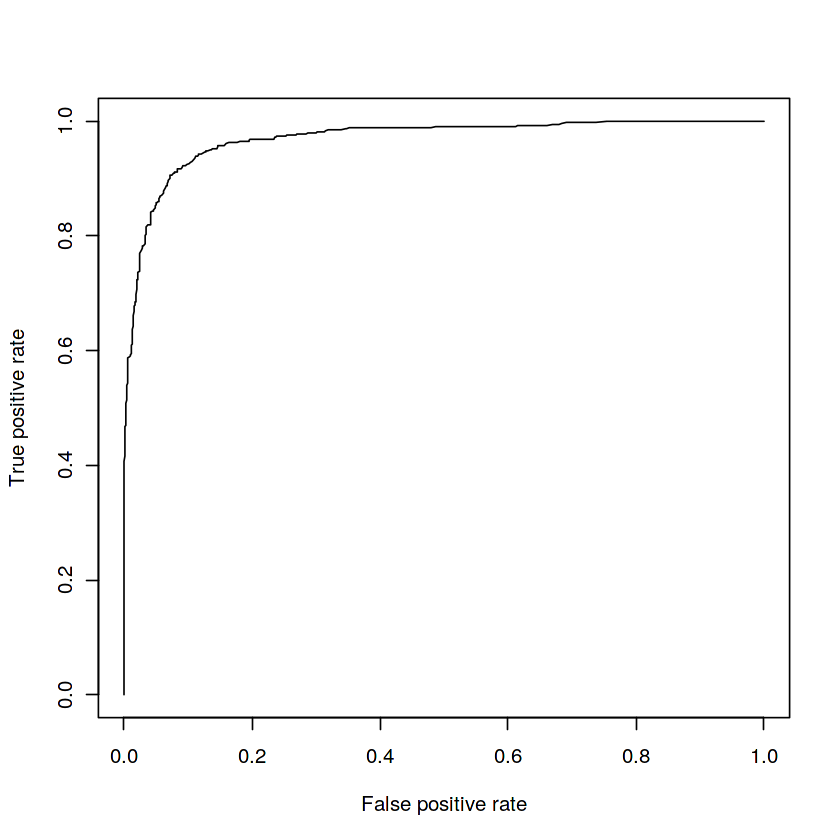

In [84]:
###  courbe ROC RF
pred_RF <- predict(fit_RF, clean_data.test[,-70], type="prob")[,2]
predictions_RF <- prediction( pred_RF,  clean_data.test$dec)
perf_RF <- performance(predictions_RF , "tpr", "fpr" )
plot(perf_RF)
AUC_RF=performance(predictions_RF, measure = "auc")@y.values[[1]]
AUC_RF

Le Random Forest réalise les meilleures performances au vu de l'accuracy et de la courbe ROC, après visualisation de la matrice de confusion on vérifie bien que nous n'avons pas de déséquilibre entre faux positifs et faux négatifs. 

Nous avons utilisé les méthodes paramétriques les plus robustes, passons maintenant aux méthodes AFC LDA et QDA pour voir si nous n'obtenons pas de meilleures performances avec celles-ci.

<a id="LDA"></a>
>> ## 4.6 LDA

In [85]:
library(MASS)
res_lda <- lda(clean_data.train$dec~.,data=clean_data.train[,-70])
pred_lda <- predict(res_lda,newdata=clean_data.test[,-70])$class
table(pred_lda, clean_data.test$dec)

        
pred_lda   0   1
       0 620  88
       1  76 455

In [86]:
Accuracy(y_pred = pred_lda, y_true = clean_data.test$dec)

[1] 0.8676352

[1] 0.9484452

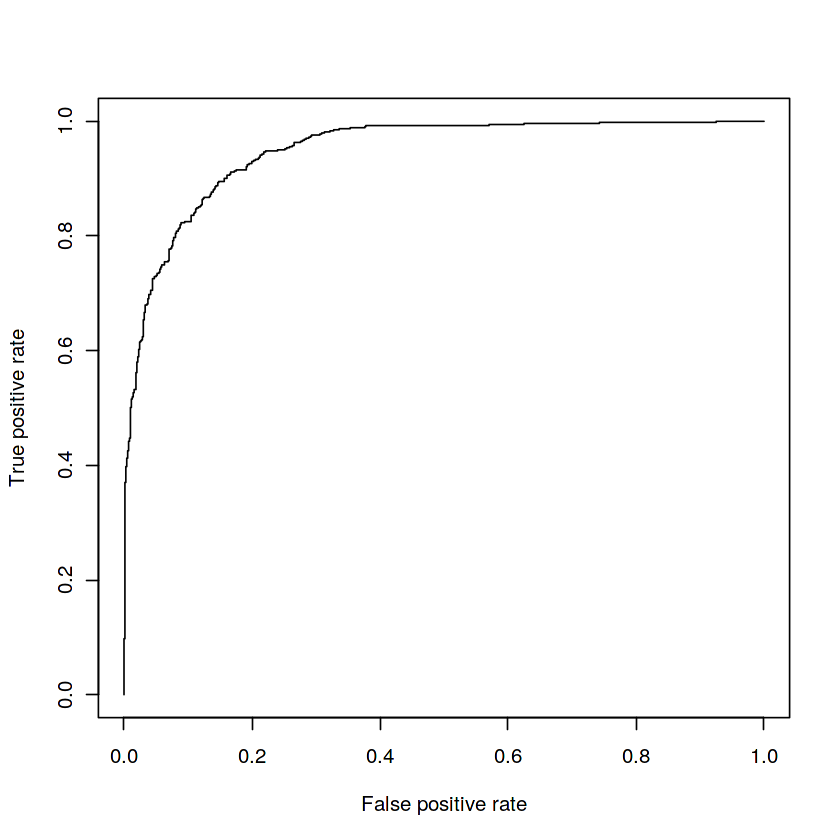

In [87]:
pred_lda <- predict(res_lda,newdata=clean_data.test[,-70])$posterior[,2]
predictions_lda <- prediction(pred_lda,  clean_data.test$dec)
perf_lda <- performance(predictions_lda , "tpr", "fpr" )
plot(perf_lda)
AUC_lda <- performance(predictions_lda,"auc")@y.values[[1]]
AUC_lda

En conclusion, l'algorithme de Random Forest est le plus performant.
Nous avons réussi à bien prédire la variable dec, à bien comprendre quelles variables explicatives sont le plus importantes. Nous avons également confronté l'être humain dans ce qu'il pense préférer et ce qu'il préfère réllement, en effet parfois notre représentation des choses n'est pas conforme à la réalité et cette analyse est là pour nous le rappeler. On aurait tendance à dire que l'attractivité est un critère important mais pas trop, que nous cherchons des personnes sincères et ambitieuses... On voit ici que ce n'est pas le cas.
Ce jeu de données possède d'autres variable intéréssantes et d'autres études peuvent être menées afin de mieux comprendre la dynamique des évènements comme le Speed Dating et le comportement de l'Homme en général dans ses relations amoureuses. 